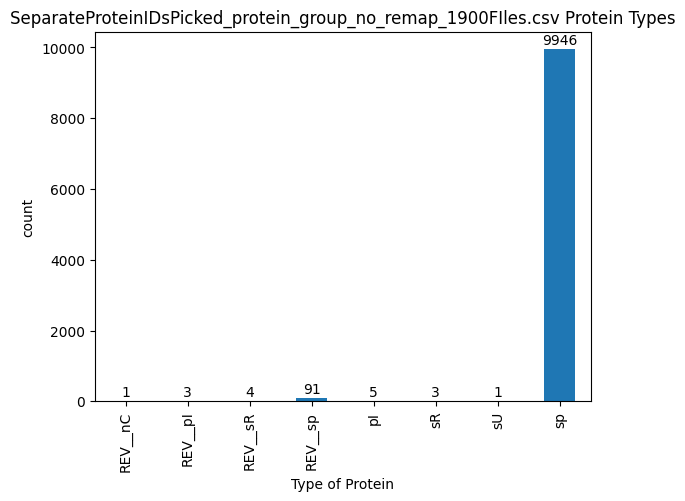

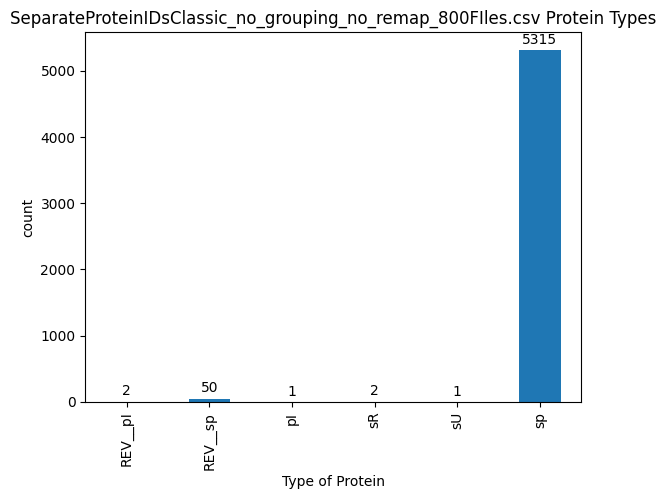

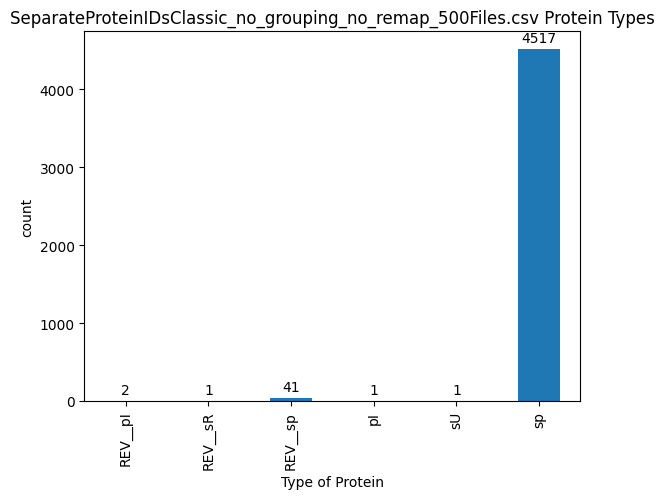

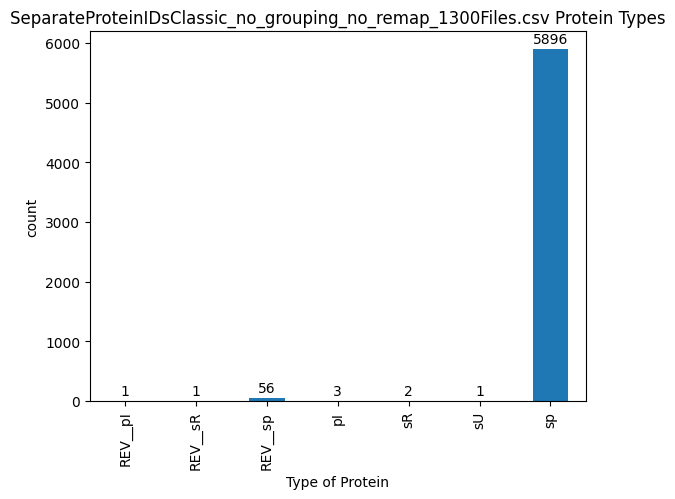

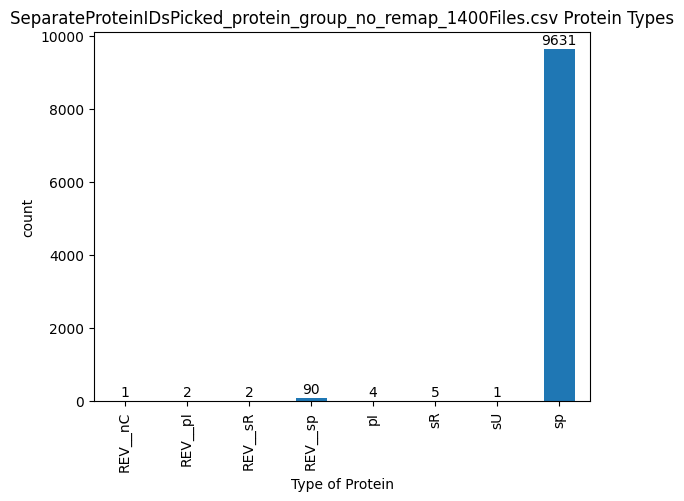

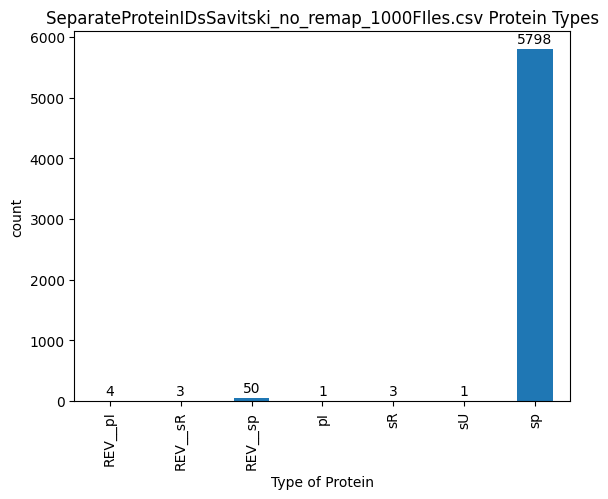

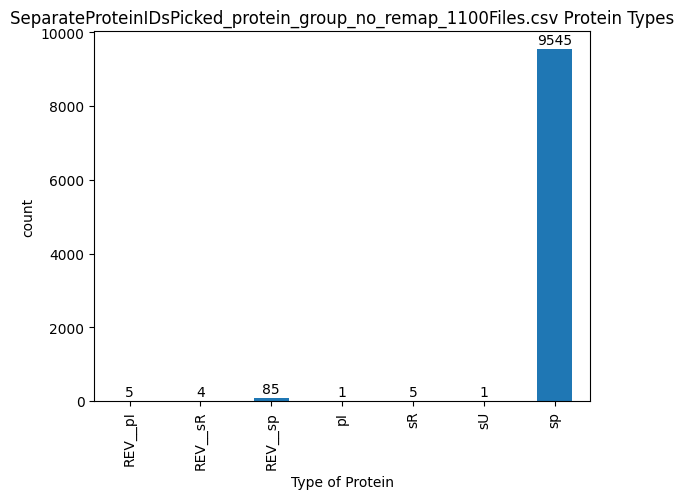

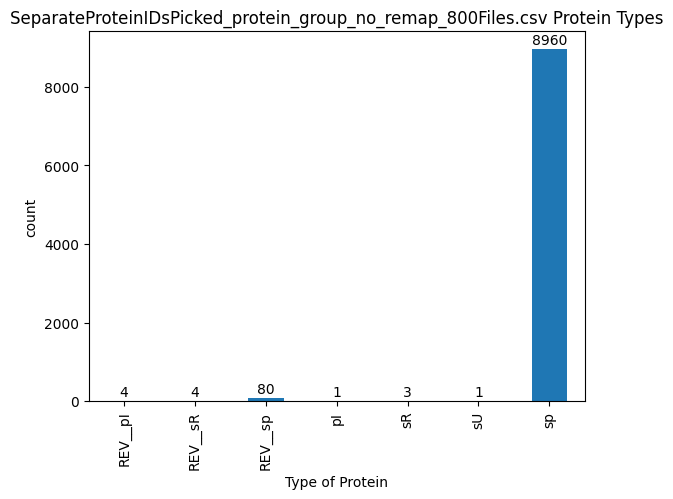

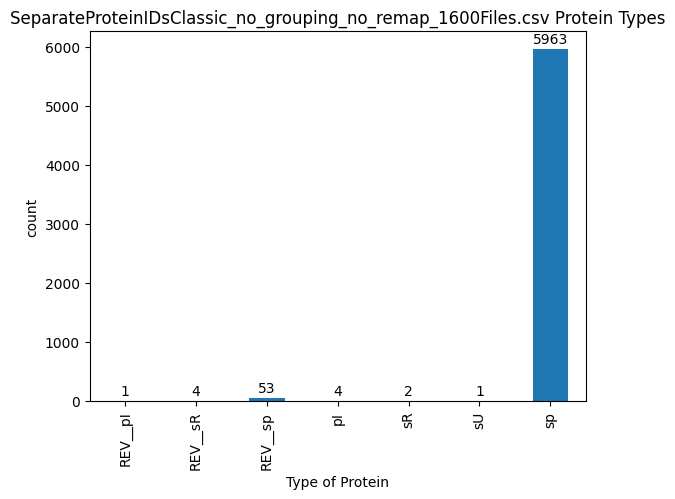

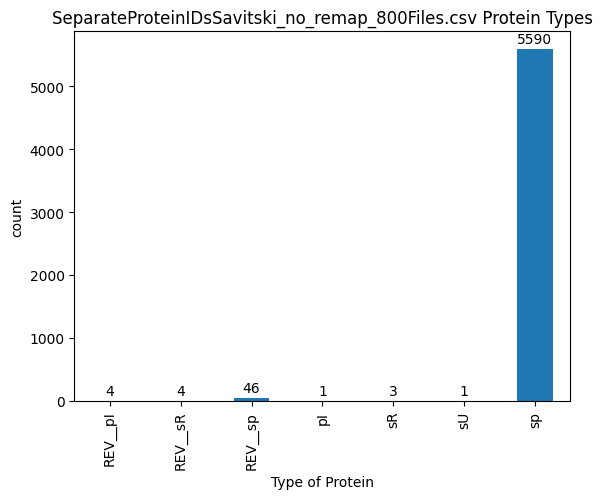

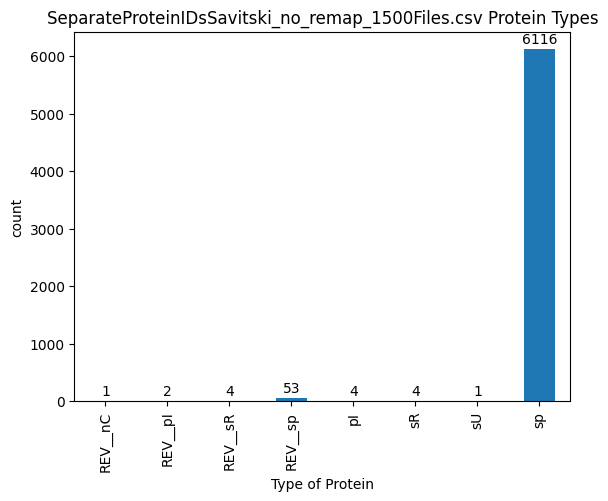

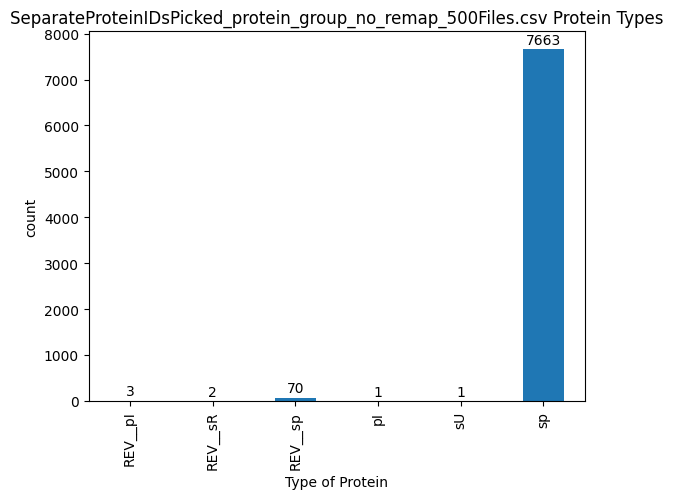

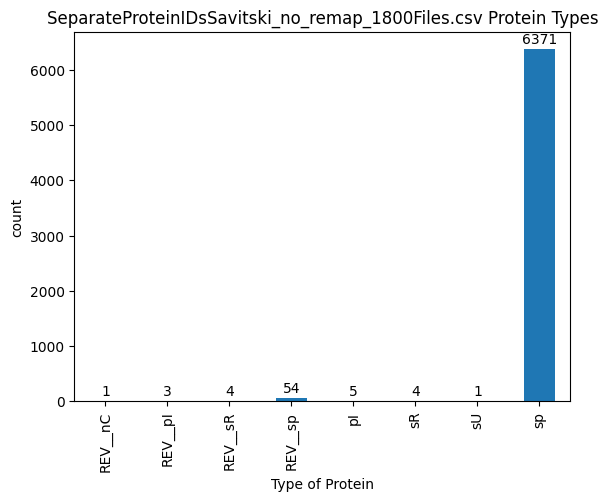

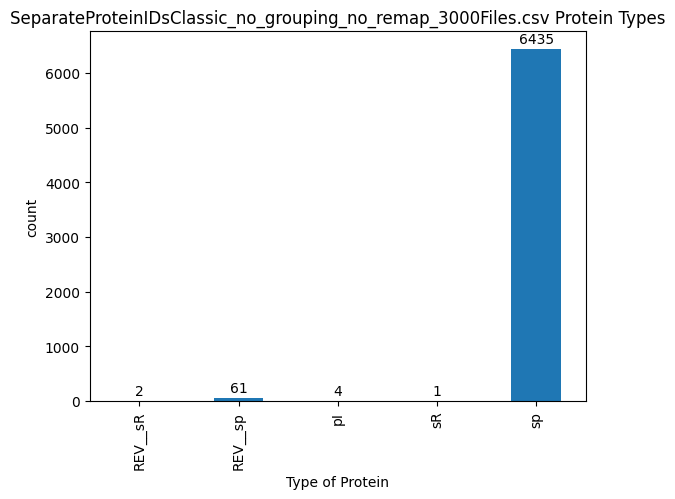

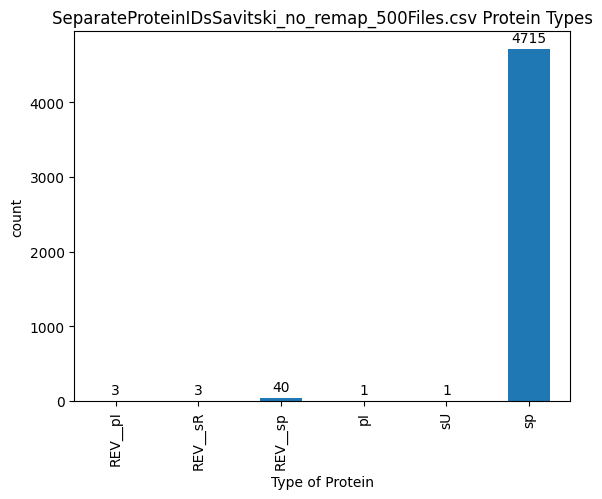

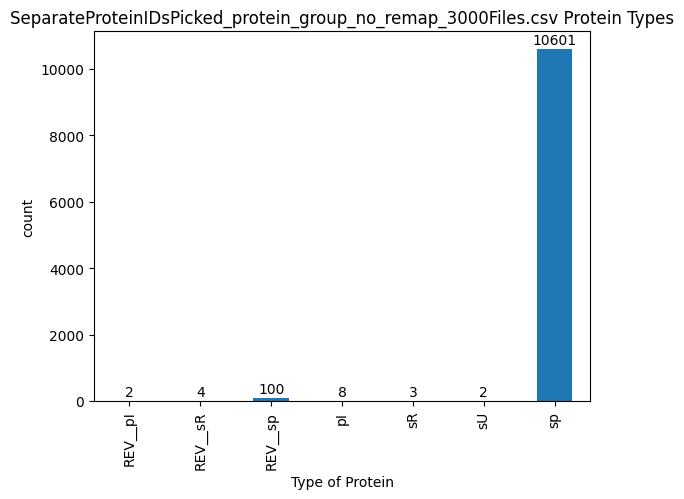

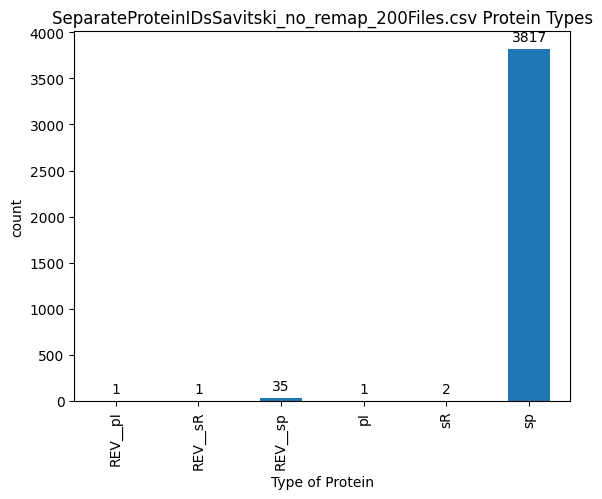

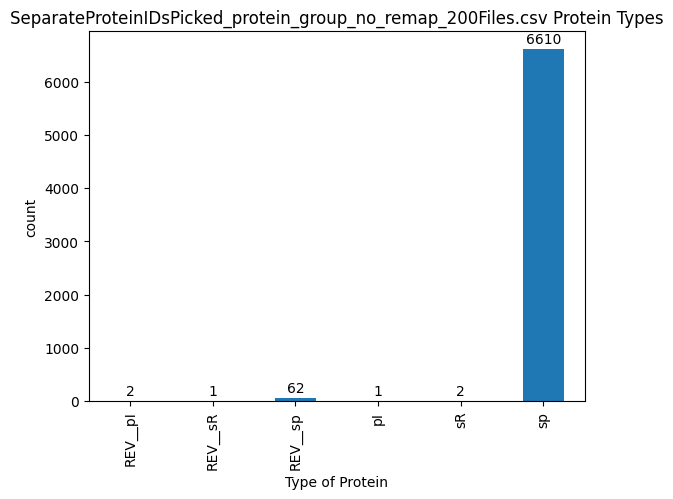

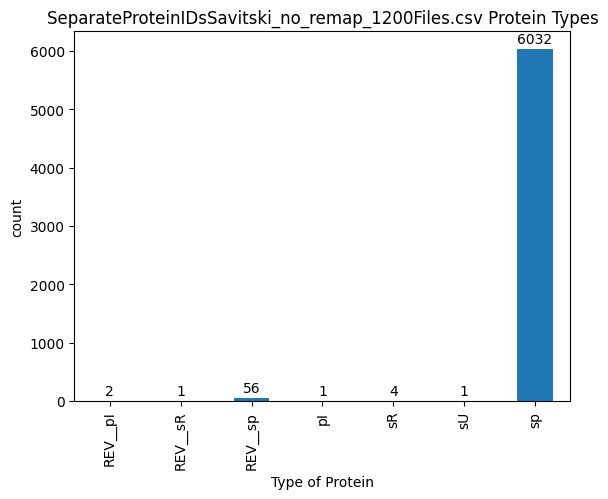

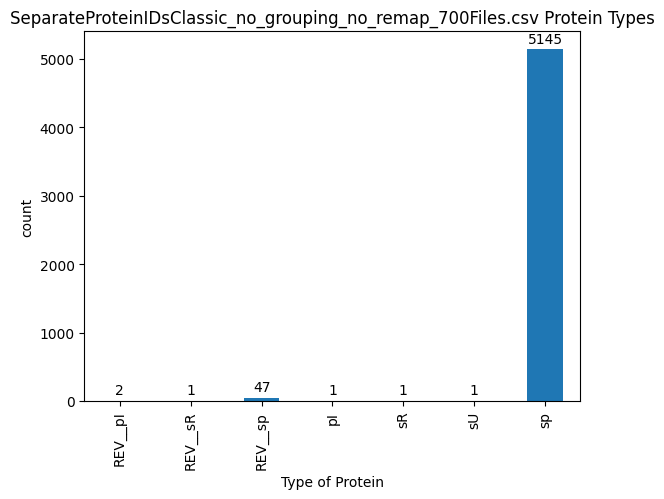

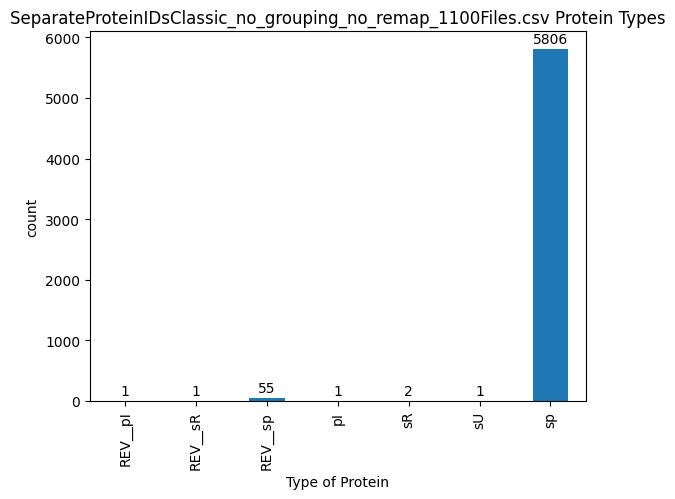

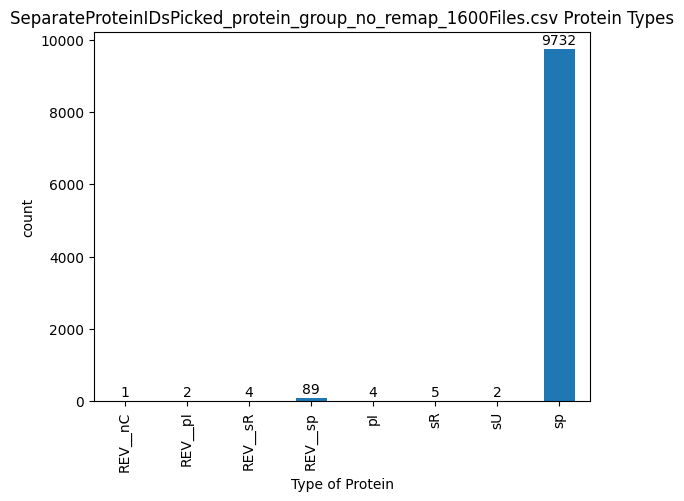

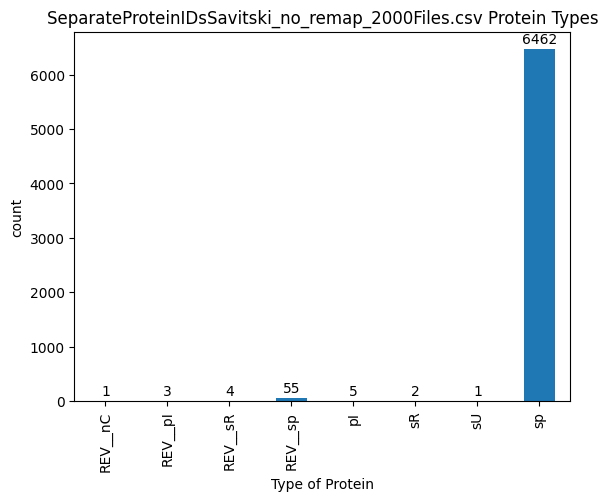

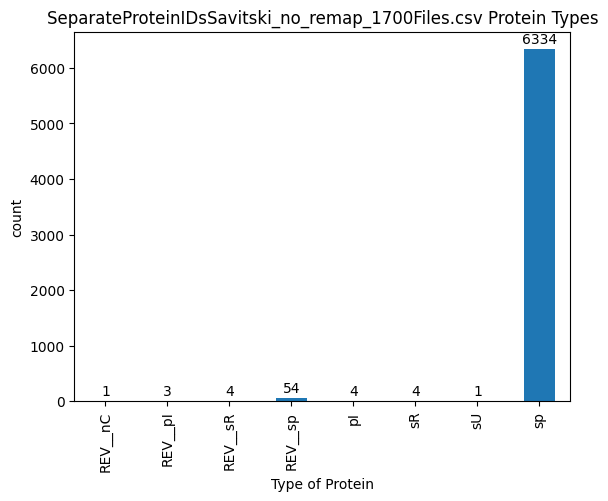

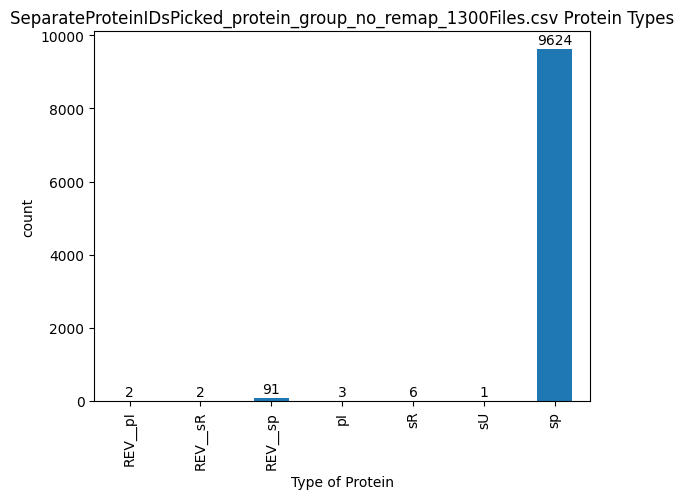

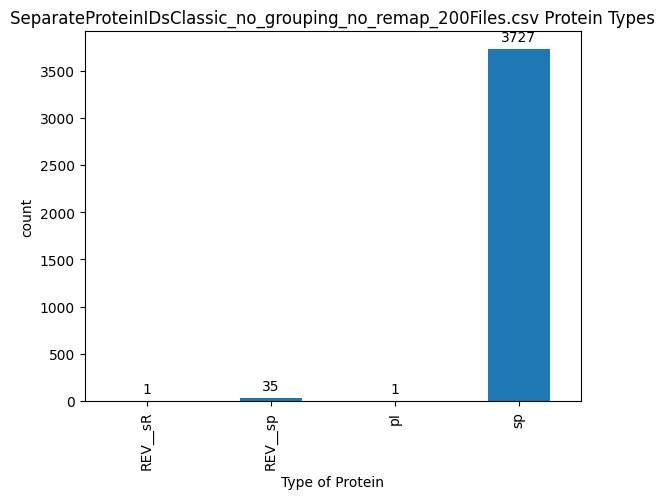

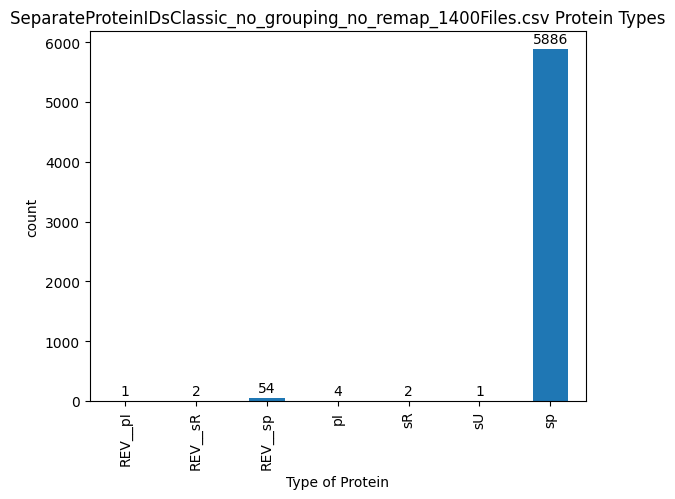

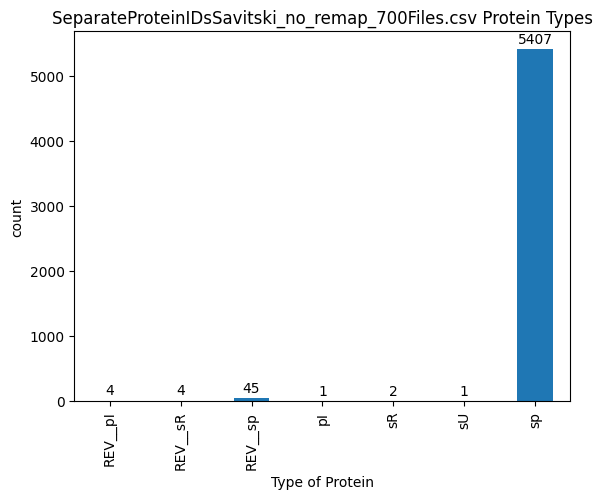

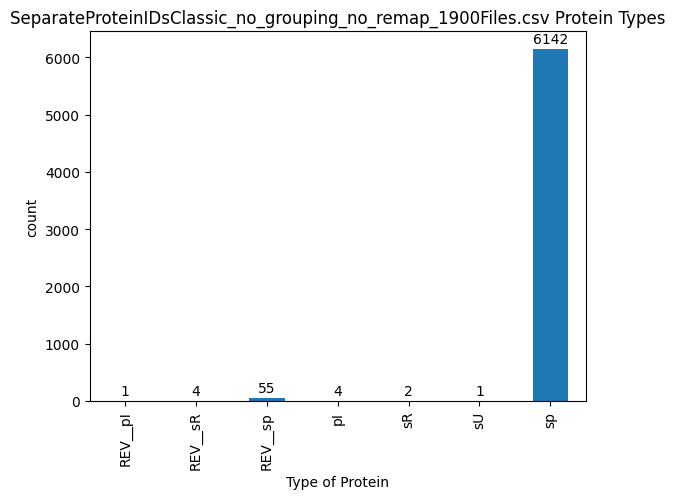

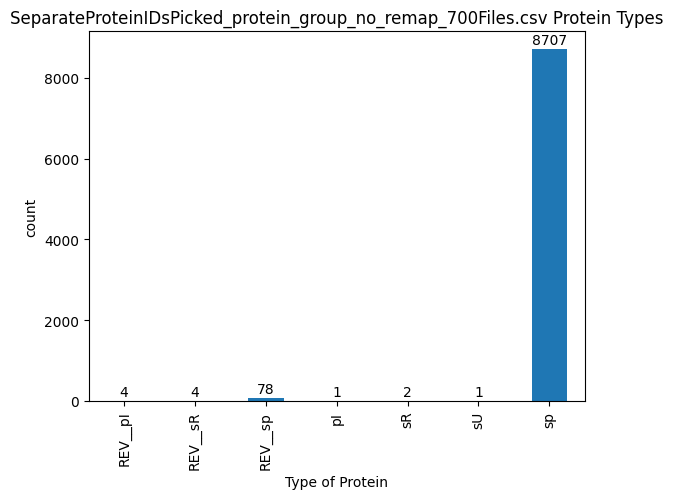

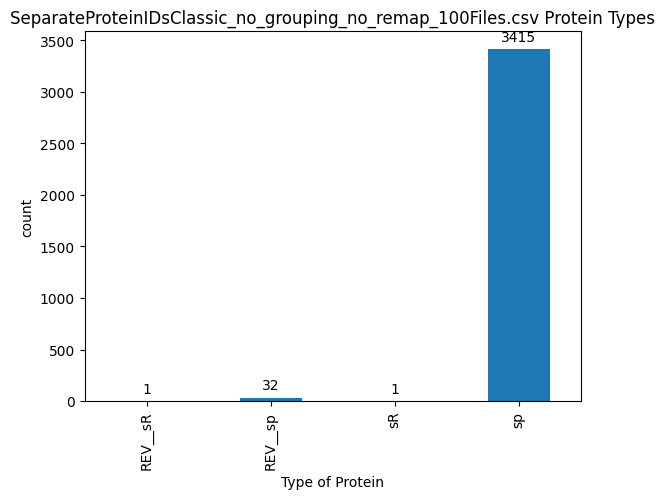

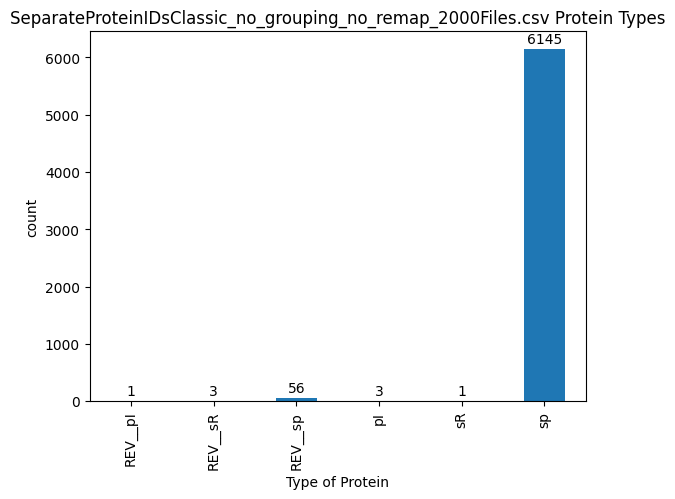

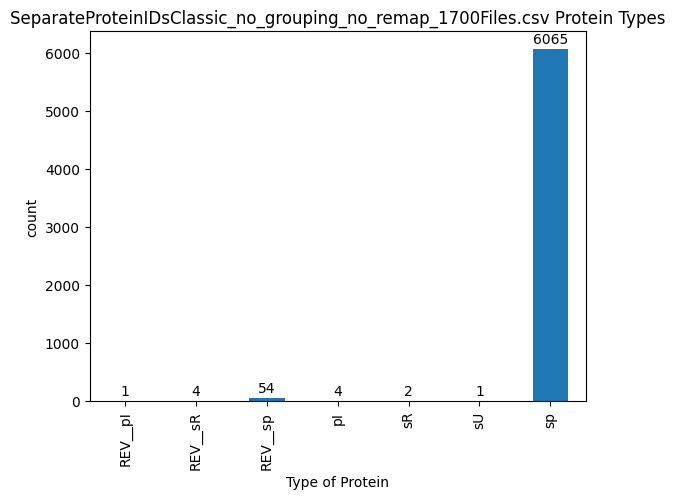

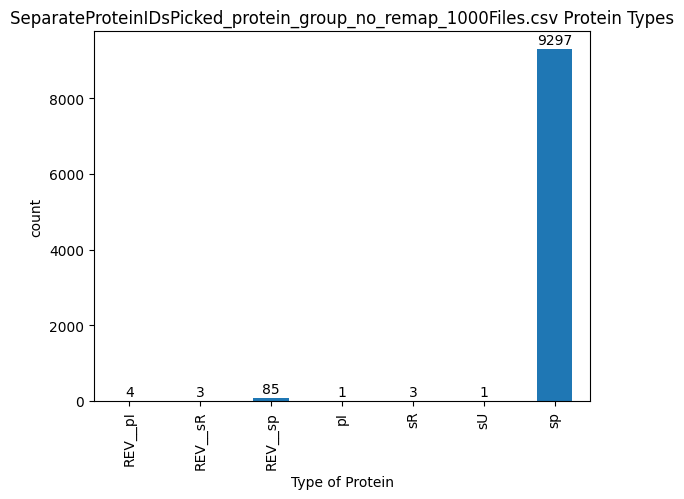

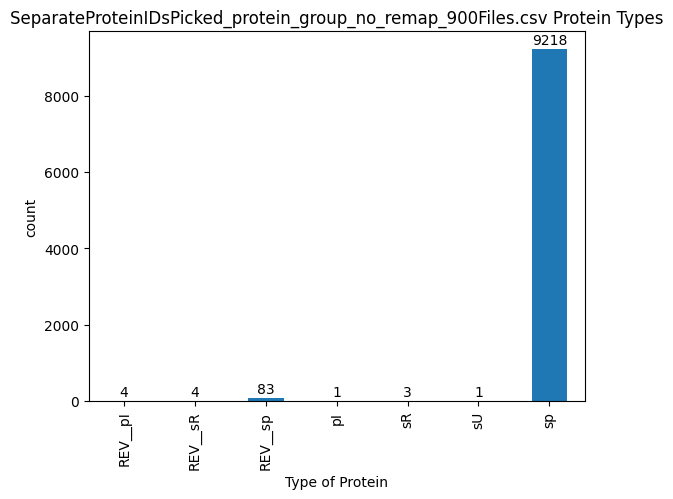

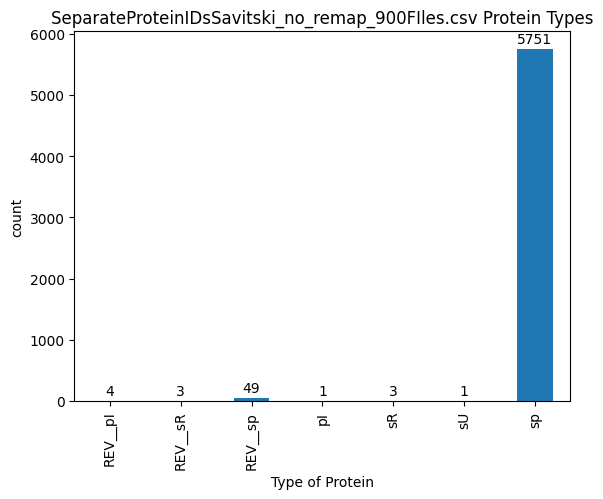

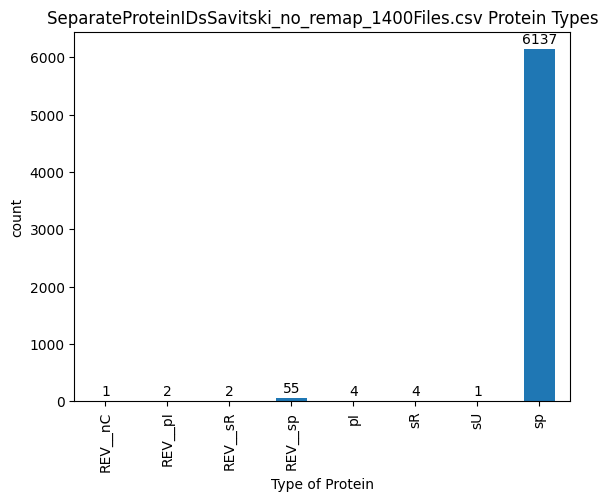

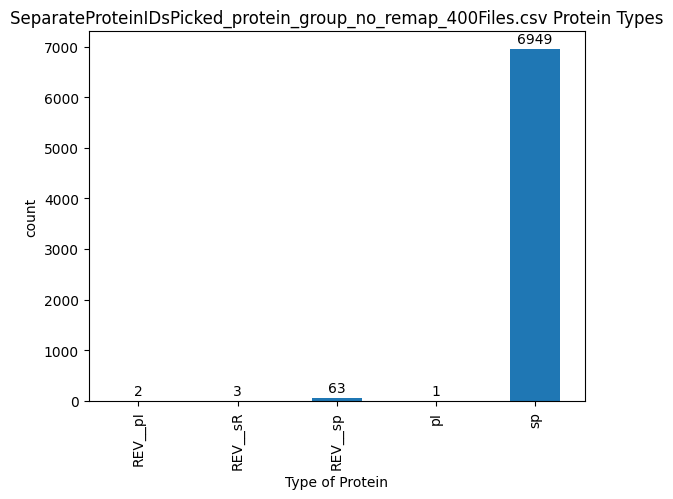

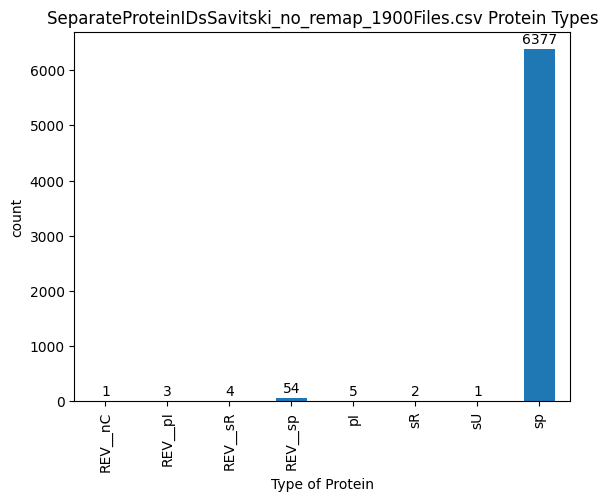

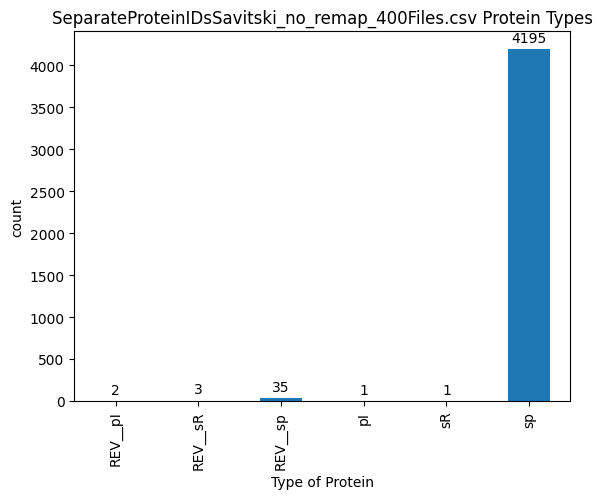

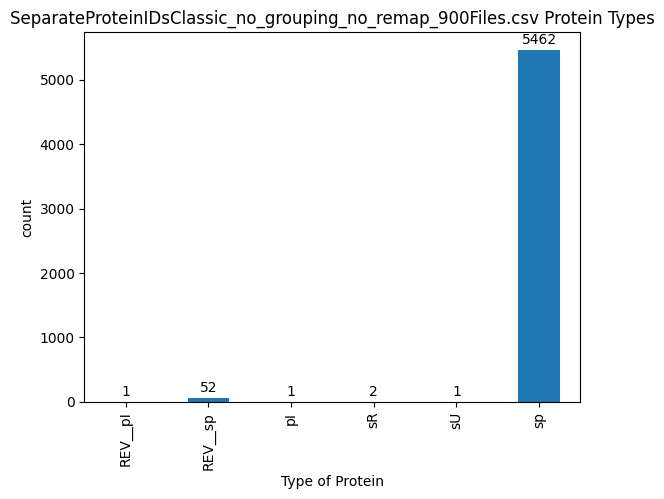

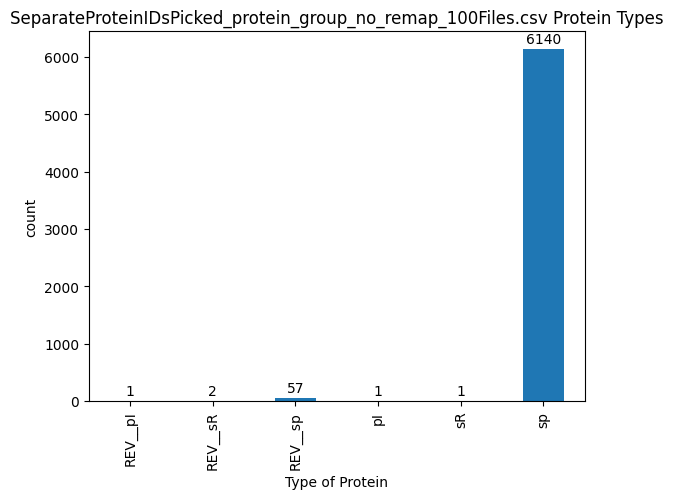

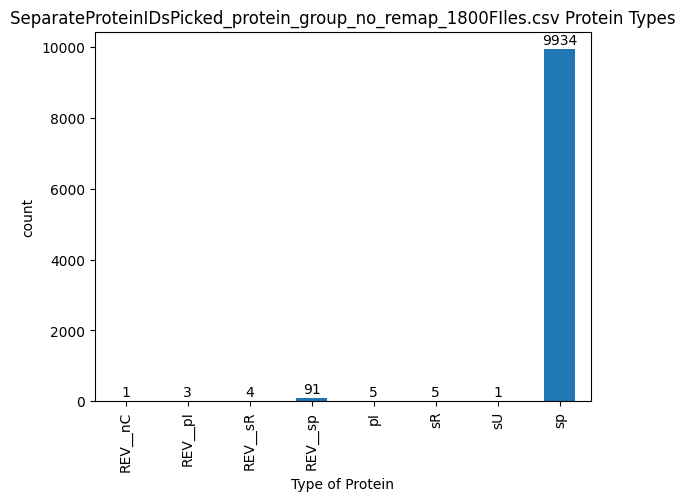

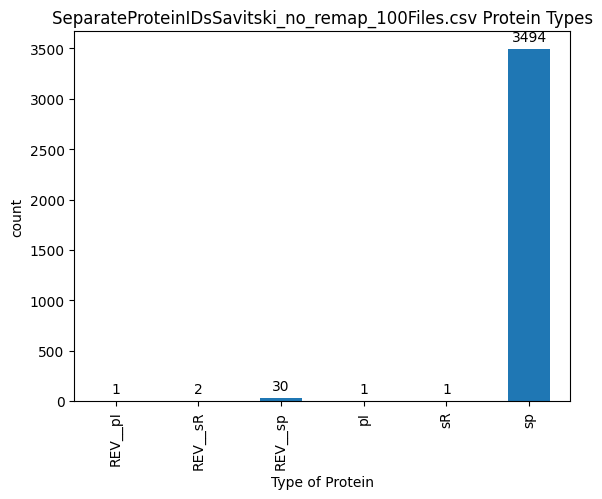

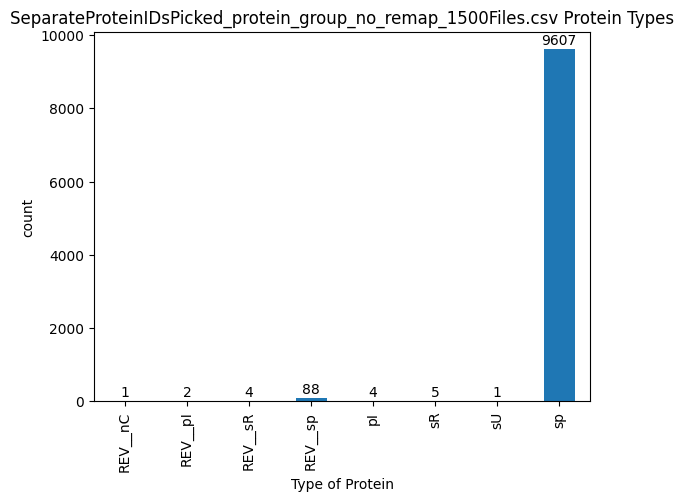

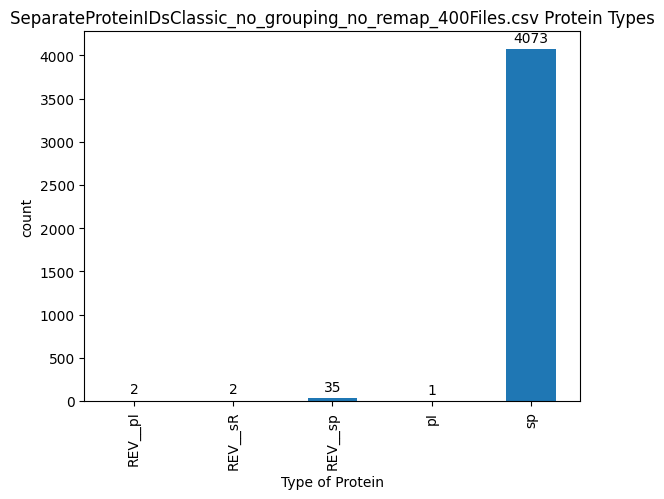


KeyboardInterrupt



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Get a list of all CSV files in the current directory
csv_files = glob.glob('*.csv')

# Loop through the CSV files
for file in csv_files:
    # Read the CSV file into a pandas dataframe
    df = pd.read_csv(file)
    
    # filter for Q-value < 0.01
    df_filtered = df[df['Q-value'] < 0.01]

    # group by protein type and count the number of each type
    protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

    # plot the value counts as a bar chart
    protein_count.plot(kind='bar')
    plt.title(f'{file} Protein Types')
    plt.xlabel('Type of Protein')
    plt.ylabel('count')
    
    # add labels to the bars
    for i, count in enumerate(protein_count):
        plt.text(i, count + 50, str(count), ha='center', va='bottom')
        
    # save the plot to a file
    plt.savefig(f'{file}_protein_types.png')
    
    # show the plot
    plt.show()

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# specify the directory containing the CSV files
csv_dir = Path('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/SeparateProteinIDs/')

# initialize an empty dataframe to store the protein counts for all files
all_files_protein_counts = pd.DataFrame(columns=['File Name', 'Type of Microprotein', 'Count'])

# Loop through the CSV files in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.endswith('.csv'):
        # Read the CSV file into a pandas dataframe
        df = pd.read_csv(os.path.join(csv_dir, csv_file))
        
        # Filter for Q-value < 0.01 and exclude Protein Type 'sp'
        df_filtered = df[(df['Q-value'] < 0.01) & (~df['Protein Type'].isin(['sp', 'REV__sp']))]

        # Group by protein type and count the number of each type
        protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count().reset_index(name='Count')

        # Add the file name as a column to the protein count dataframe
        protein_count['File Name'] = csv_file

        # Append the protein counts for this file to the all_files_protein_counts dataframe
        all_files_protein_counts = all_files_protein_counts.append(protein_count)

# Save the protein counts dataframe as a CSV file
all_files_protein_counts.to_csv('MicroproteinCount_RawFiles.csv', index=False)


/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2327961741.py:28: FutureWarning: The frame.append method is

# Q-value filter (1% FDR) for different types of microproteins

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# specify the directory containing the CSV files
csv_dir = Path('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/SeparateProteinIDs/')

# Define a list of filenames in the desired order
file_order = ['SeparateProteinIDsClassic_no_grouping_no_remap_100Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_200Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_300Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_400Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_500Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_600Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_700Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_800Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_900Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1000Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1100Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1200Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1300Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1400Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1500Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1600Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1700Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1800Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1900Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_2000Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_3000Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_4000Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_5000Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_6000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_100Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_200Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_300Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_400Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_500Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_600Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_700Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_800Files.csv',
              'SeparateProteinIDsSavitski_no_remap_900Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1100Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1200Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1300Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1400Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1500Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1600Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1700Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1800Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1900Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_2000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_3000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_4000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_5000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_6000Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_100Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_200Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_300Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_400Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_500Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_600Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_700Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_800Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_900Files.csv',
              'SeparateProteinIDsPicked_protein_group_no_remap_1000Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1100Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1200Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1300Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1400Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1500Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1600Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1700Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1800Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1900Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_2000Files.csv',
              'SeparateProteinIDsPicked_protein_group_no_remap_3000Files.csv',
              'SeparateProteinIDsPicked_protein_group_no_remap_4000Files.csv',
              'SeparateProteinIDsPicked_protein_group_no_remap_5000Files.csv',
              'SeparateProteinIDsPicked_protein_group_no_remap_6000Files.csv',
             ]


# initialize an empty dataframe to store the protein counts for all files
all_files_protein_counts = pd.DataFrame(columns=['File Name', 'Count', 'Protein Type'])

# Loop through the files in the specified order
for csv_file in file_order:
    # Read the CSV file into a pandas dataframe
    df = pd.read_csv(os.path.join(csv_dir, csv_file))
    
    # Filter for Q-value < 0.01 and exclude Protein Type 'sp'
    df_filtered = df[(df['Q-value'] < 0.01) & (~df['Protein Type'].isin(['sp', 'REV__sp']))]

    # Group by protein type and count the number of each type
    protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count().reset_index(name='Count')

    # Add the file name as a column to the protein count dataframe
    protein_count['File Name'] = csv_file

    # Append the protein counts for this file to the all_files_protein_counts dataframe
    all_files_protein_counts = all_files_protein_counts.append(protein_count)

# Save the protein counts dataframe as a CSV file
all_files_protein_counts.to_csv('all_files_protein_counts.csv', index=False)

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append metho

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append metho

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/1736746810.py:103: FutureWarning: The frame.append metho

In [27]:
df=pd.read_csv('all_files_protein_counts.csv')
print(df)

                                             File Name  Count Protein Type
0    SeparateProteinIDsClassic_no_grouping_no_remap...      1      REV__sR
1    SeparateProteinIDsClassic_no_grouping_no_remap...      1           sR
2    SeparateProteinIDsClassic_no_grouping_no_remap...      1      REV__sR
3    SeparateProteinIDsClassic_no_grouping_no_remap...      1           pI
4    SeparateProteinIDsClassic_no_grouping_no_remap...      1      REV__pI
..                                                 ...    ...          ...
332  SeparateProteinIDsPicked_protein_group_no_rema...      1      REV__pI
333  SeparateProteinIDsPicked_protein_group_no_rema...      4      REV__sR
334  SeparateProteinIDsPicked_protein_group_no_rema...      1           nC
335  SeparateProteinIDsPicked_protein_group_no_rema...      4           pI
336  SeparateProteinIDsPicked_protein_group_no_rema...      4           sR

[337 rows x 3 columns]


In [32]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('all_files_protein_counts.csv')

# Extract the method name and number of raw files from the file name
df['Method'] = df['File Name'].apply(lambda x: x.split('_')[1] + '_' + x.split('_')[2])
df['Number of Raw Files'] = df['File Name'].apply(lambda x: int(x.split('_')[-1].replace('Files.csv', '')))

# Save the modified dataframe as a new CSV file
df.to_csv('all_files_protein_count_modified.csv', index=False)

In [34]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('all_files_protein_counts.csv')

# Extract the method name and number of raw files from the file name
df['Method'] = df['File Name'].apply(lambda x: 'classic_no_grouping_no_remap' if 'classic' in x else 'savitski_no_remap' if 'savitski' in x else 'picked_protein_group_no_remap')
df['Number of Raw Files'] = df['File Name'].apply(lambda x: int(x.split('_')[-1].replace('Files.csv', '')))

# Save the modified dataframe as a new CSV file
df.to_csv('all_files_protein_count_modified.csv', index=False)

In [35]:
df=pd.read_csv('all_files_protein_count_modified.csv')
print(df)

                                             File Name  Count Protein Type  \
0    SeparateProteinIDsClassic_no_grouping_no_remap...      1      REV__sR   
1    SeparateProteinIDsClassic_no_grouping_no_remap...      1           sR   
2    SeparateProteinIDsClassic_no_grouping_no_remap...      1      REV__sR   
3    SeparateProteinIDsClassic_no_grouping_no_remap...      1           pI   
4    SeparateProteinIDsClassic_no_grouping_no_remap...      1      REV__pI   
..                                                 ...    ...          ...   
332  SeparateProteinIDsPicked_protein_group_no_rema...      1      REV__pI   
333  SeparateProteinIDsPicked_protein_group_no_rema...      4      REV__sR   
334  SeparateProteinIDsPicked_protein_group_no_rema...      1           nC   
335  SeparateProteinIDsPicked_protein_group_no_rema...      4           pI   
336  SeparateProteinIDsPicked_protein_group_no_rema...      4           sR   

                            Method  Number of Raw Files  
0    

# Number of each protein type as number of raw files increases

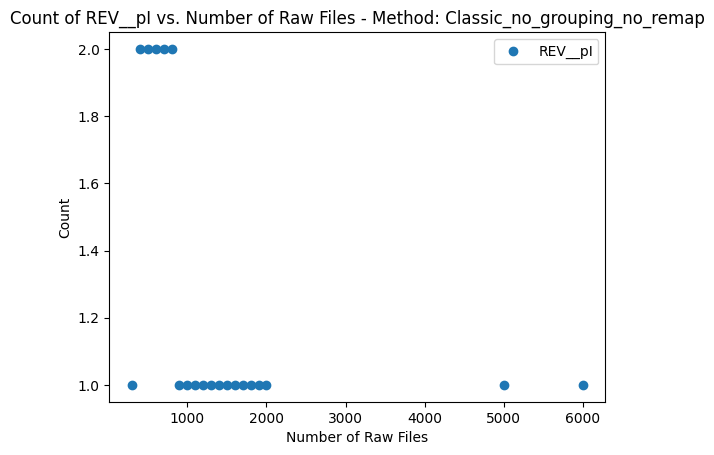

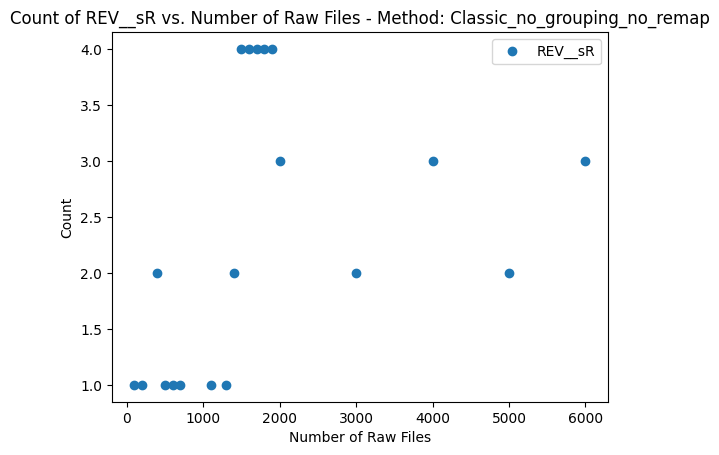

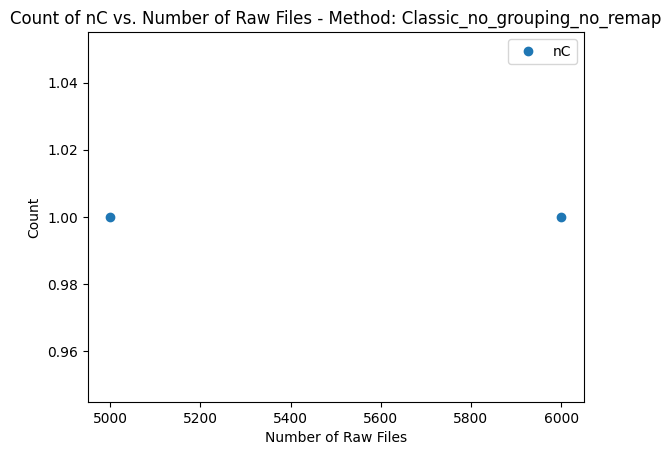

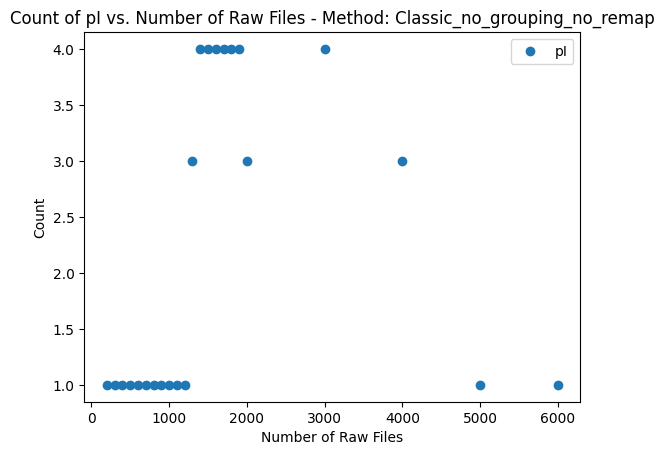

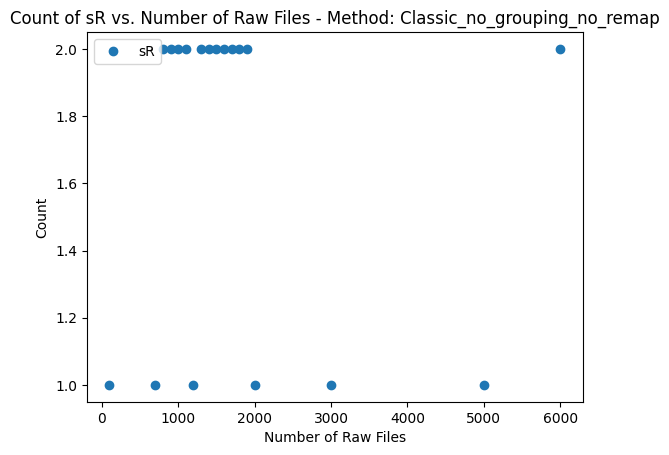

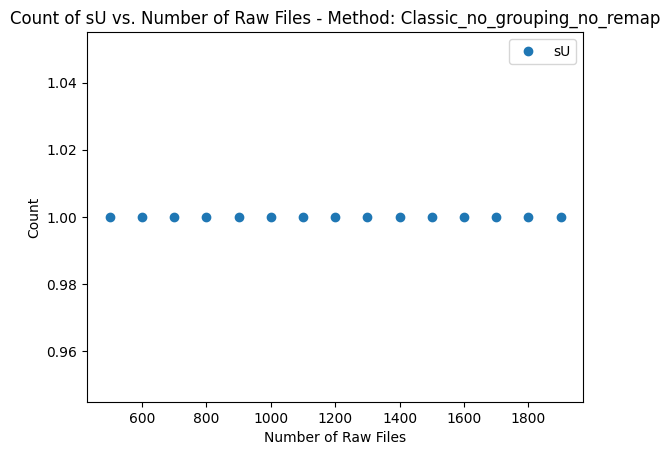

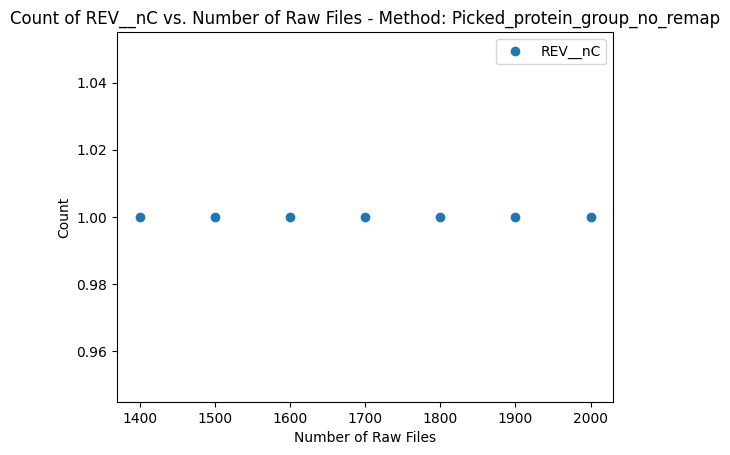

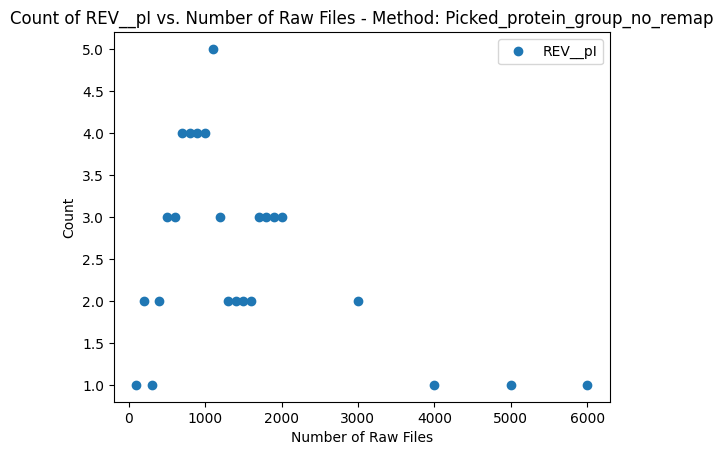

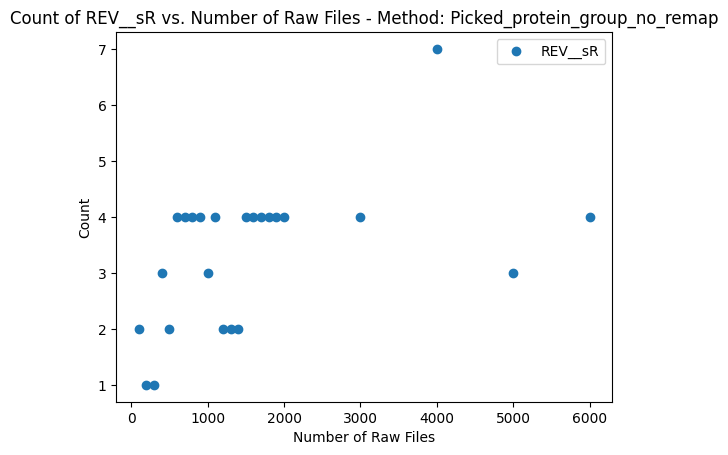

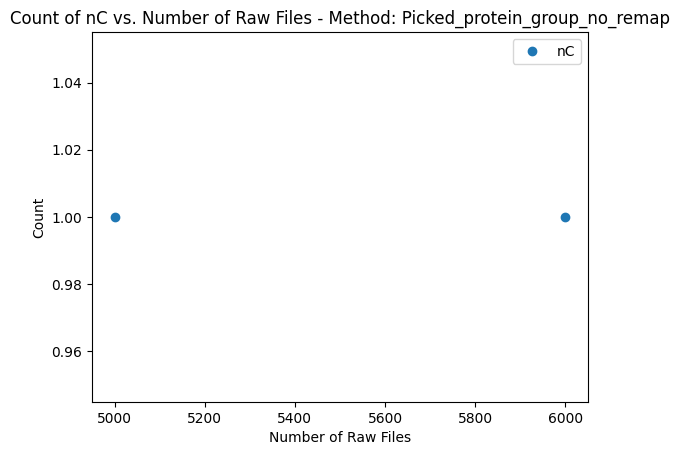

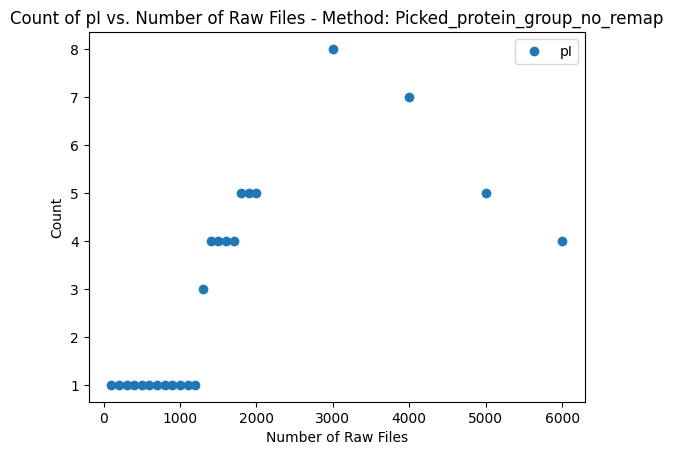

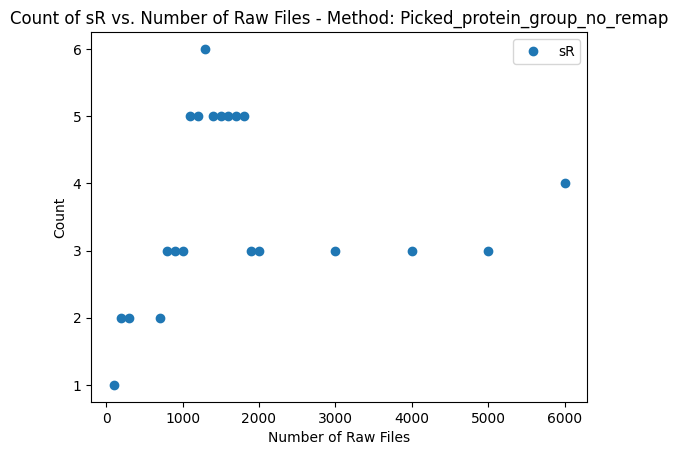

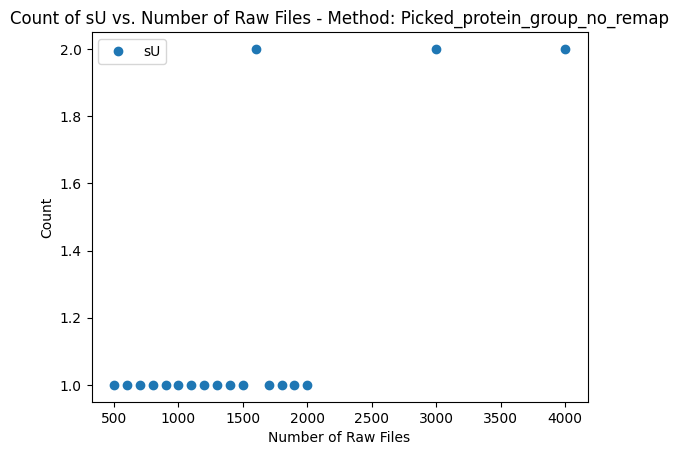

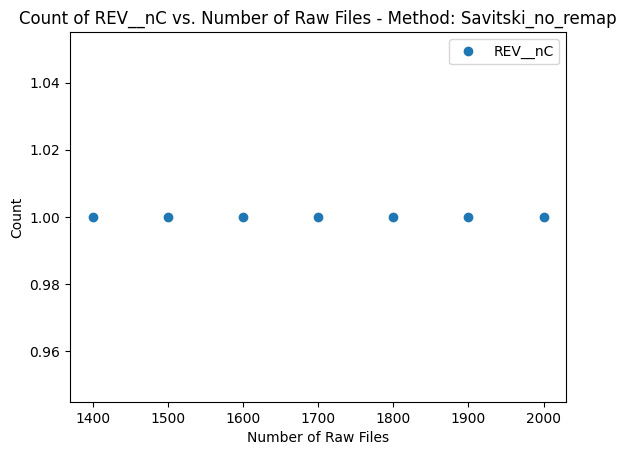

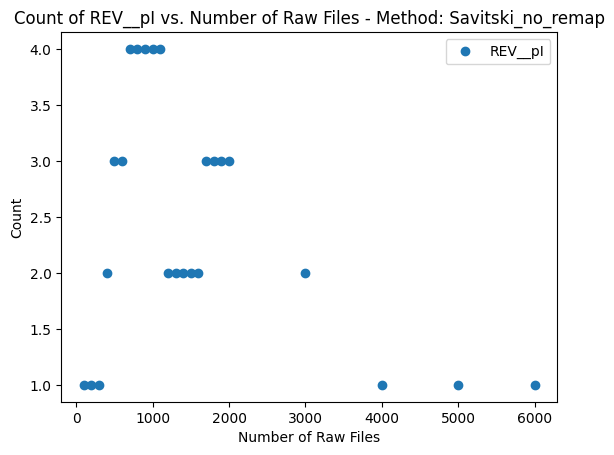

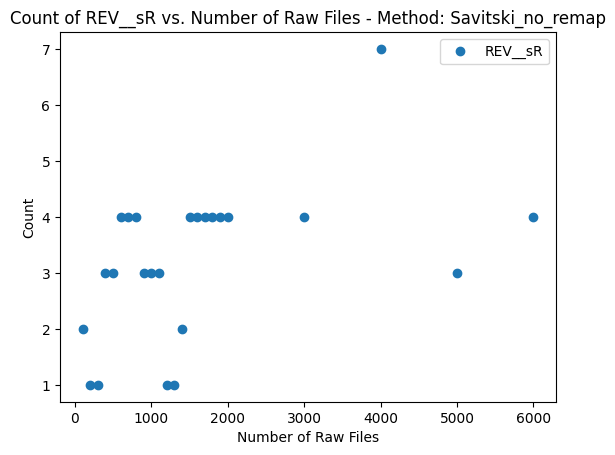

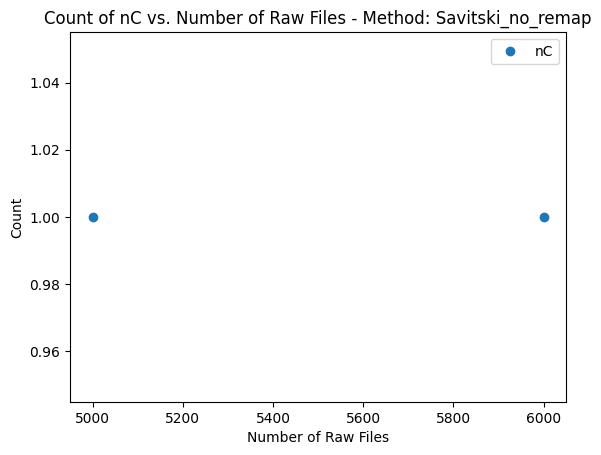

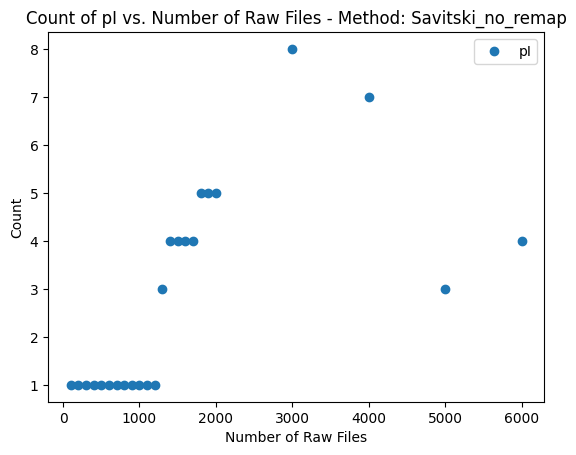

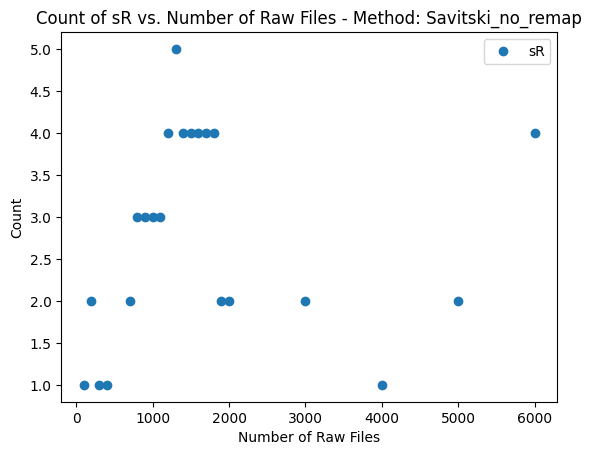

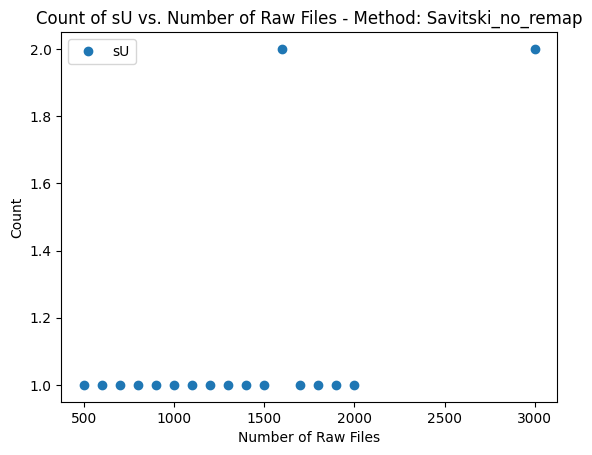

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('all_files_protein_count_modified.csv')

# Group the data by method and protein type
grouped = df.groupby(['Method', 'Protein Type'])

# Loop through the grouped data and create a separate plot for each method-protein type combination
for (method, protein_type), group in grouped:
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the count of each protein type against the number of raw files
    ax.plot(group['Number of Raw Files'], group['Count'], marker='o', linestyle='', label=protein_type)
    
    # Set the axis labels and legend
    ax.set_xlabel('Number of Raw Files')
    ax.set_ylabel('Count')
    ax.legend()
    
    # Set the title of the plot based on the protein type and method
    ax.set_title(f'Count of {protein_type} vs. Number of Raw Files - Method: {method}')
    
    # Show the plot
    plt.show()

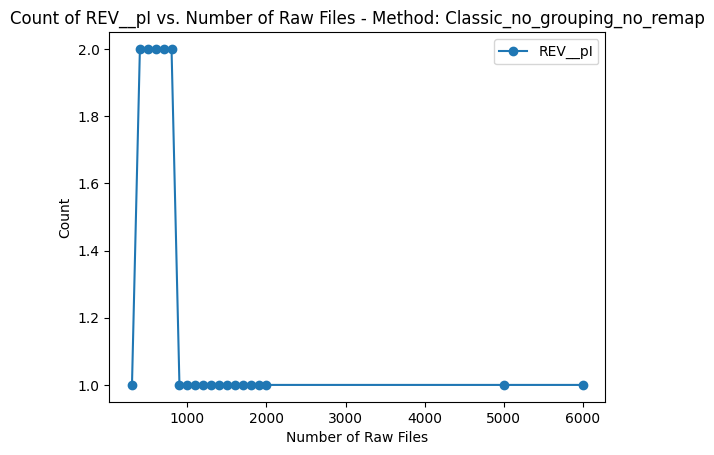

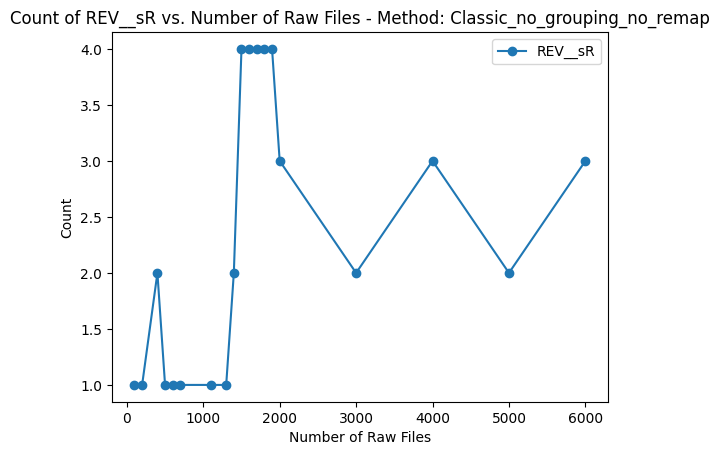

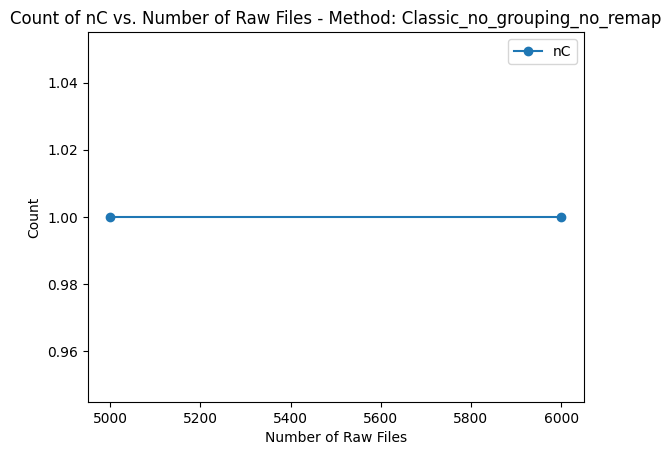

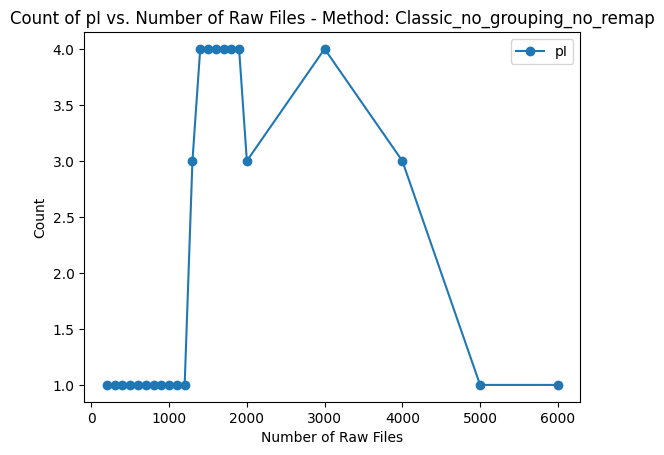

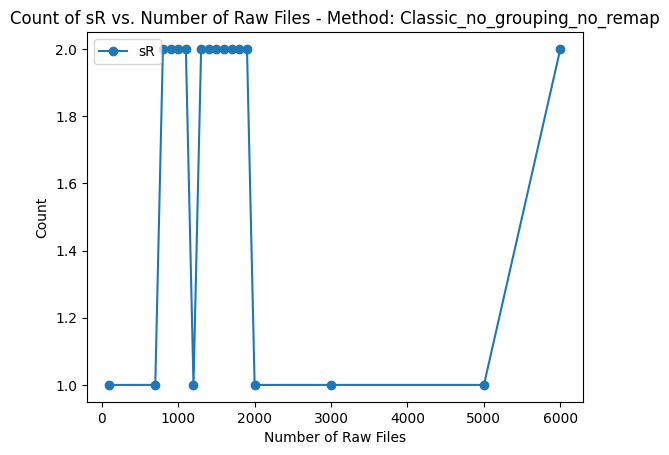

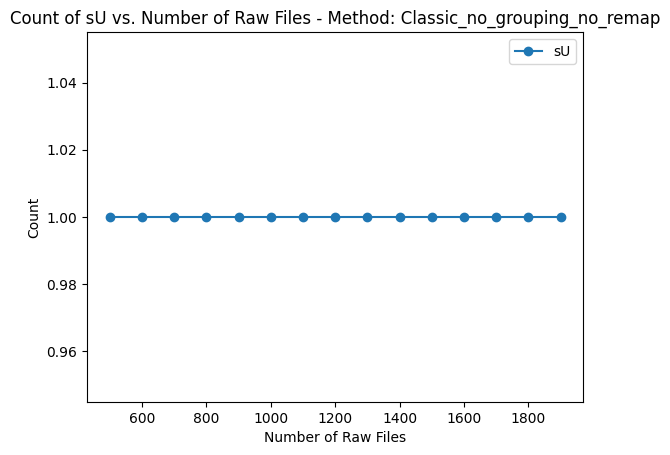

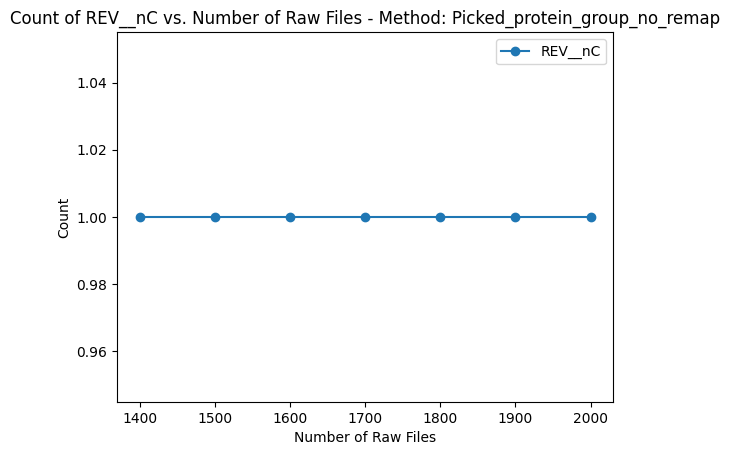

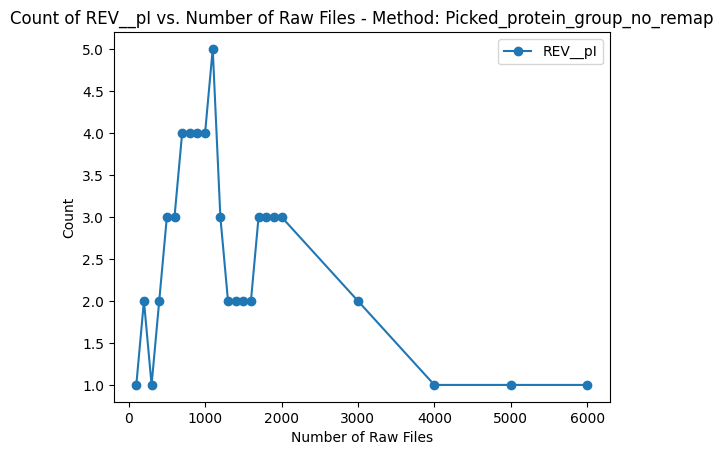

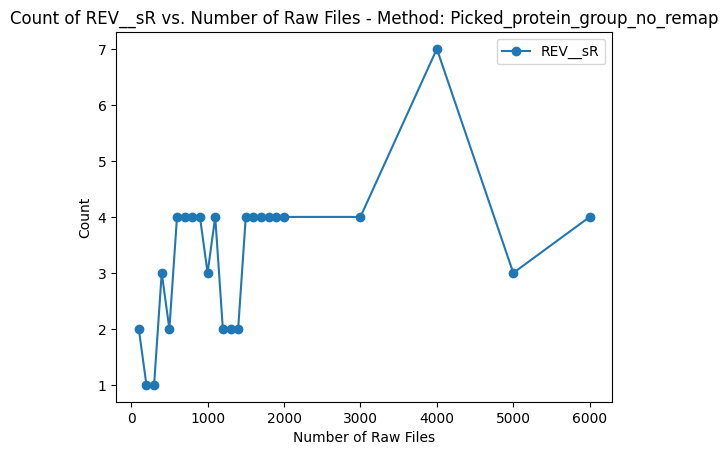

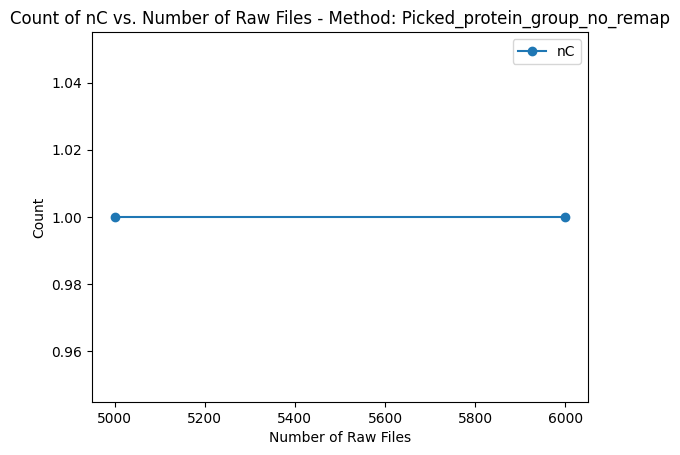

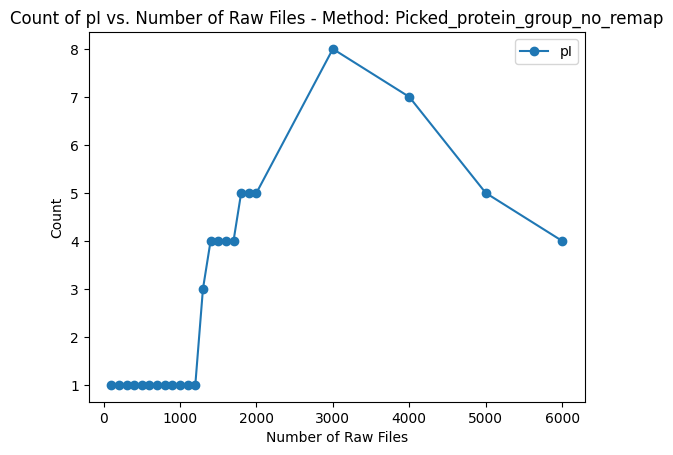

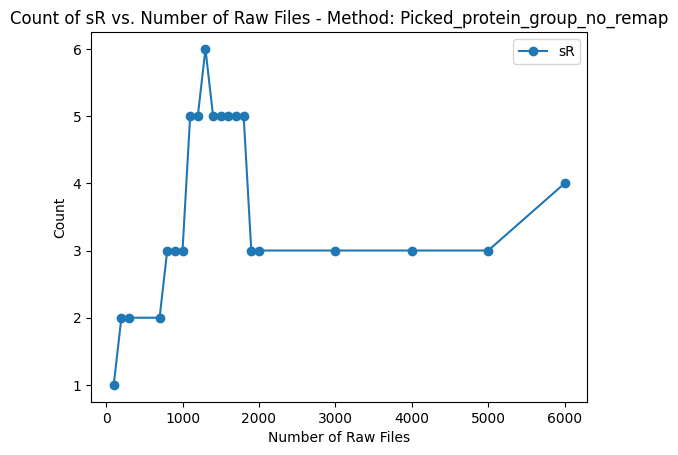

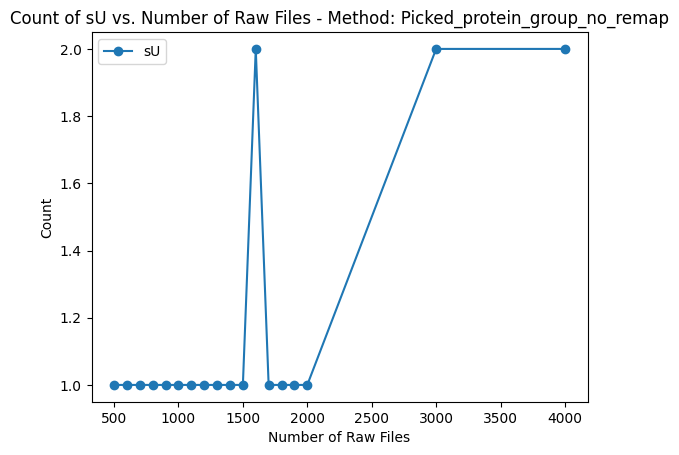

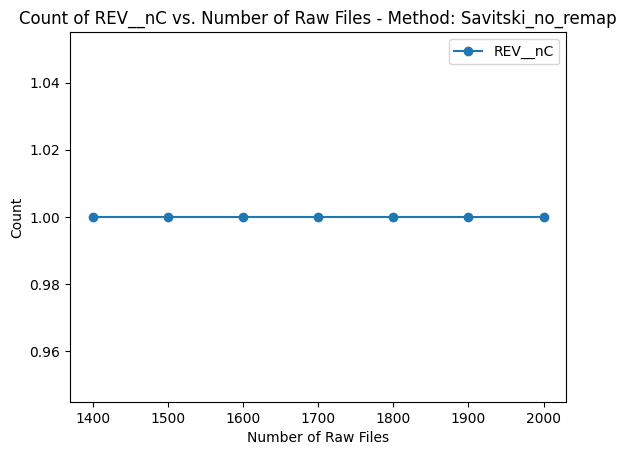

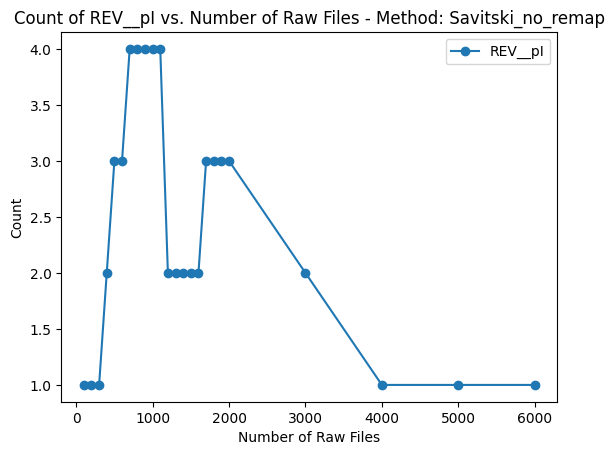

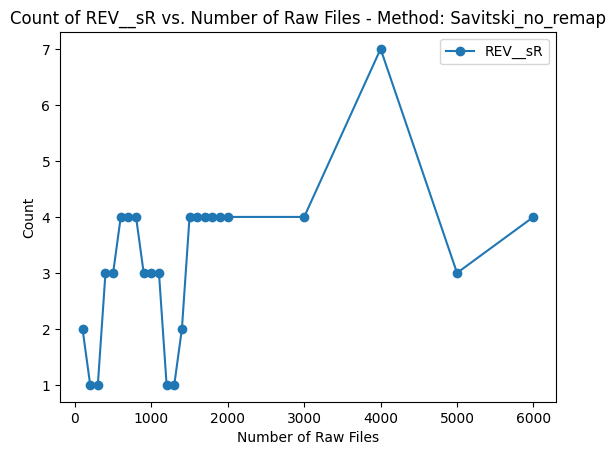

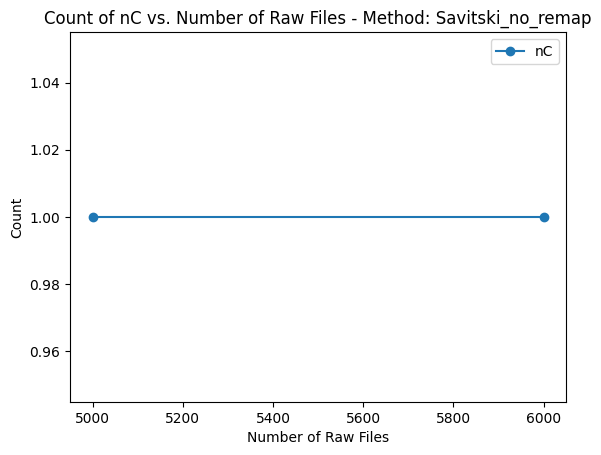

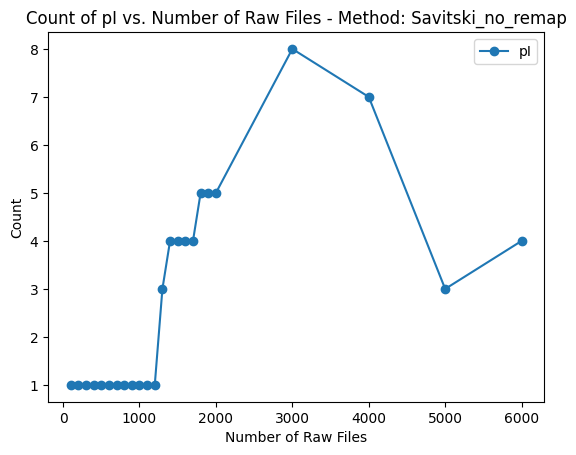

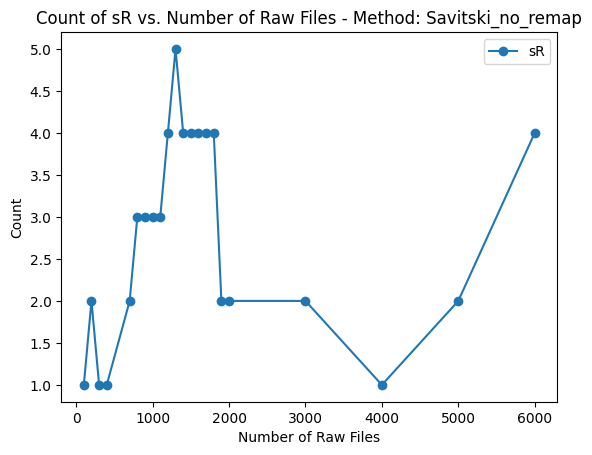

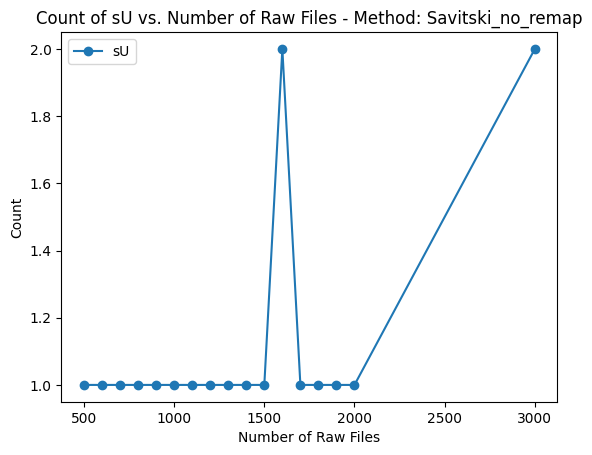

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('all_files_protein_count_modified.csv')

# Group the data by method and protein type
grouped = df.groupby(['Method', 'Protein Type'])

# Loop through the grouped data and create a separate plot for each method-protein type combination
for (method, protein_type), group in grouped:
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the count of each protein type against the number of raw files
    ax.plot(group['Number of Raw Files'], group['Count'], marker='o', linestyle='-', label=protein_type)
    
    # Set the axis labels and legend
    ax.set_xlabel('Number of Raw Files')
    ax.set_ylabel('Count')
    ax.legend()
    
    # Set the title of the plot based on the protein type and method
    ax.set_title(f'Count of {protein_type} vs. Number of Raw Files - Method: {method}')
    
    # Show the plot
    plt.show()

# Code to save the plots. 

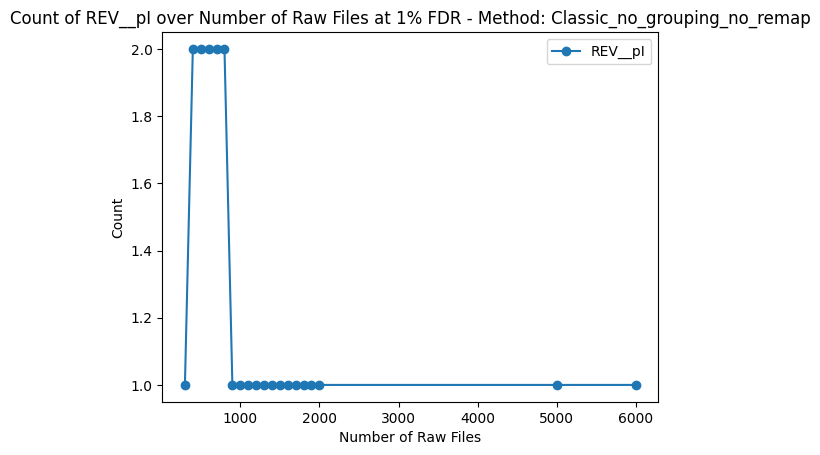

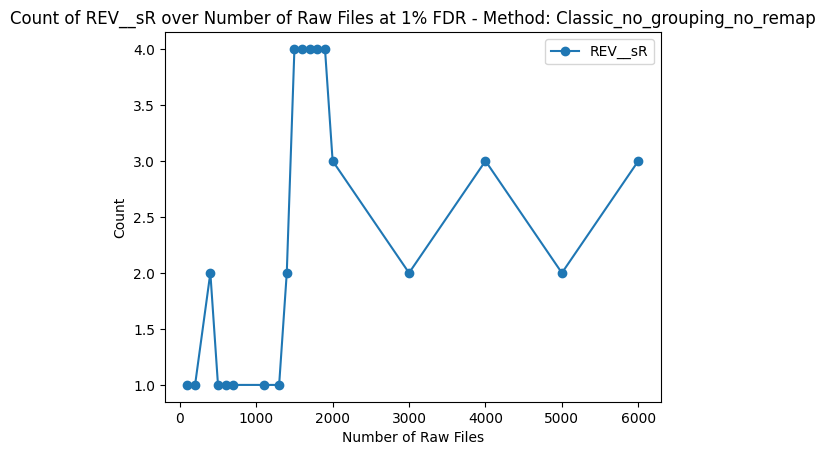

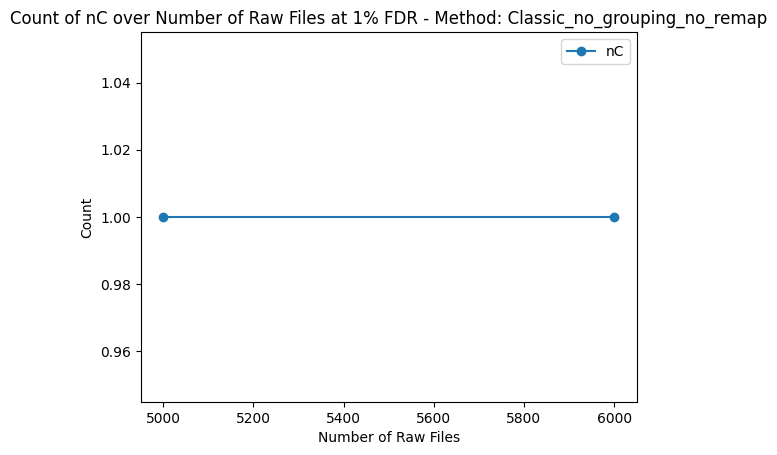

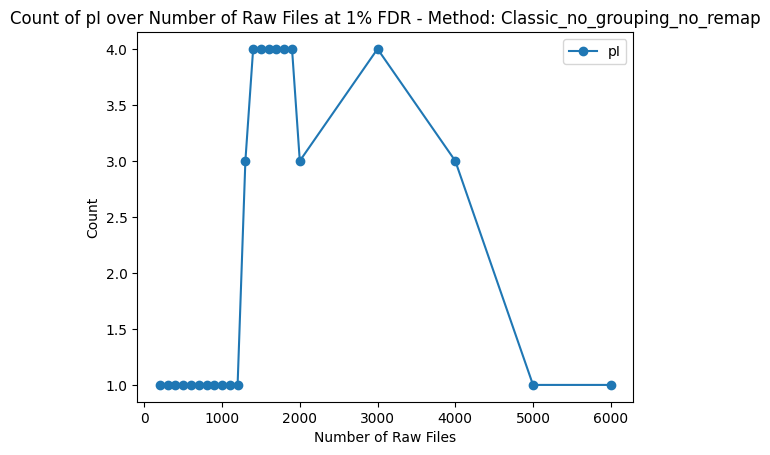

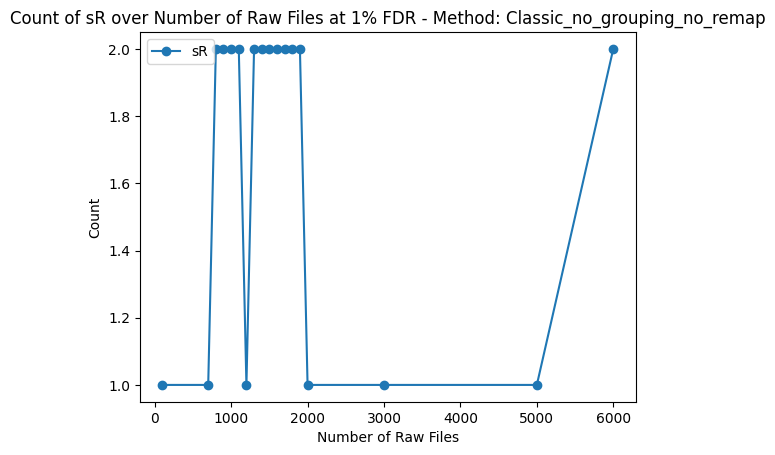

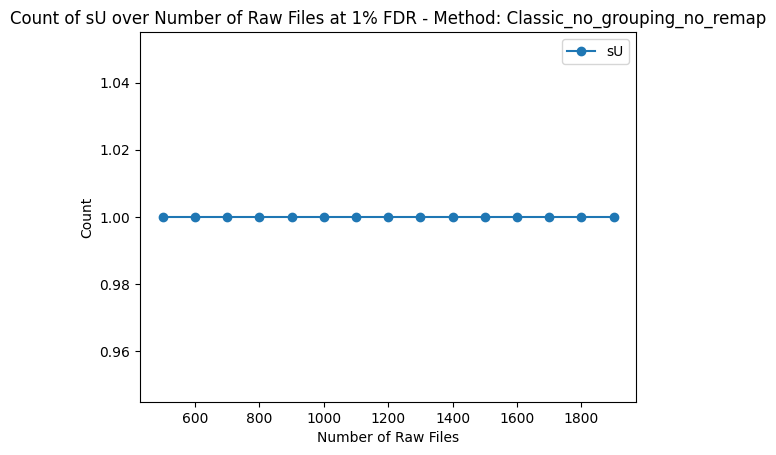

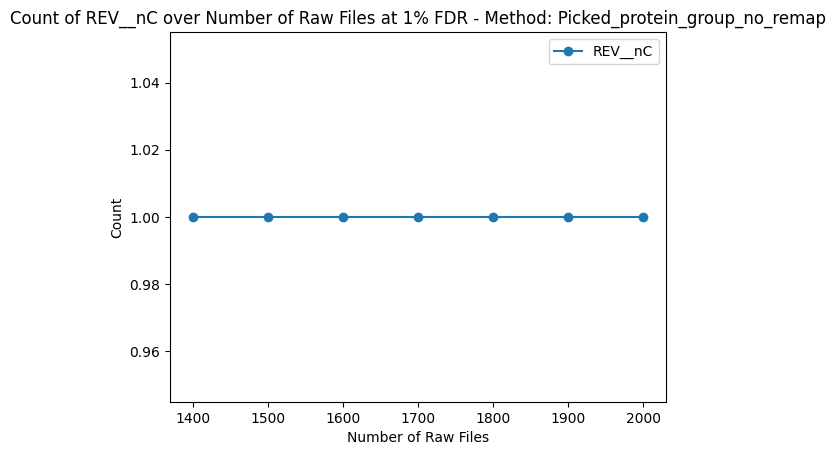

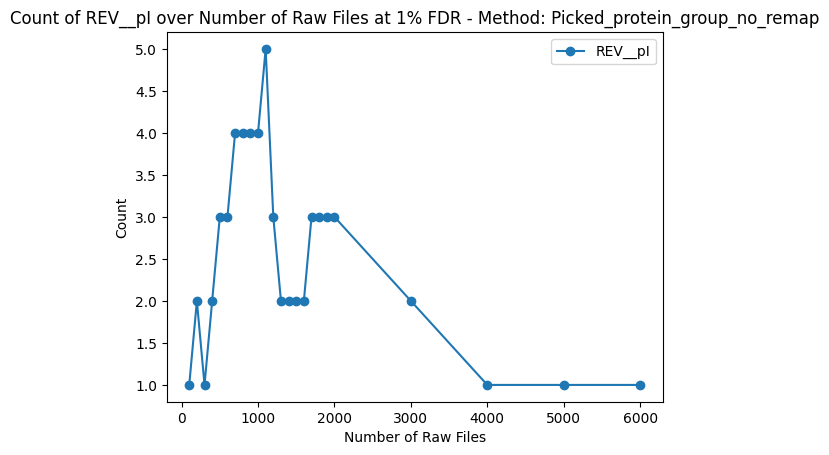

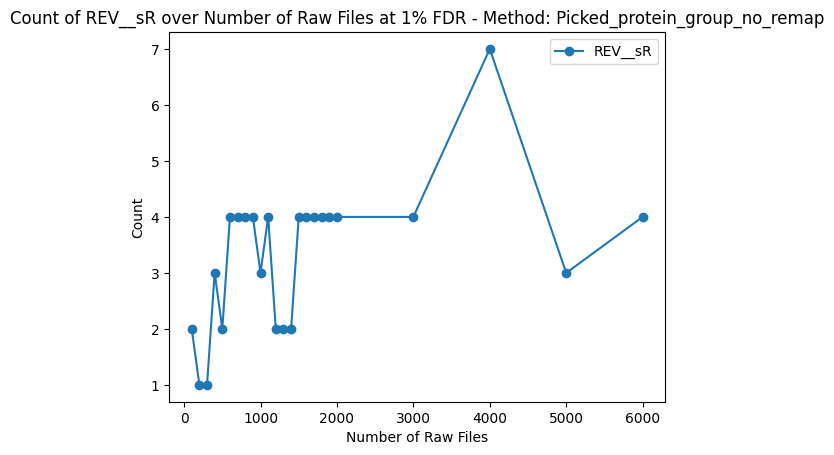

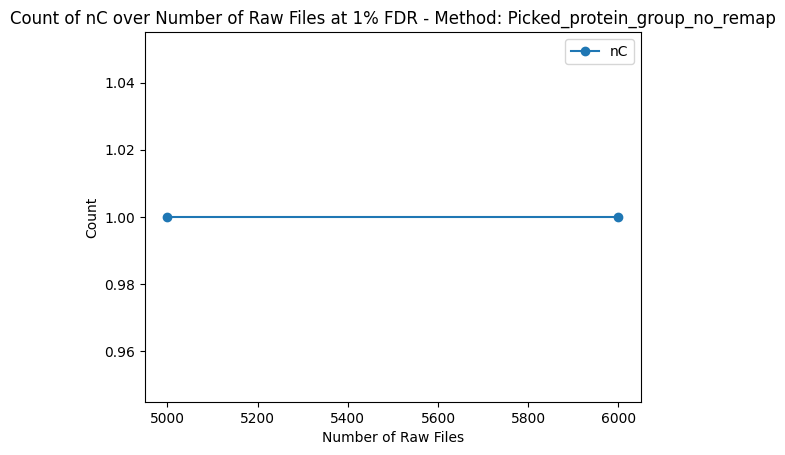

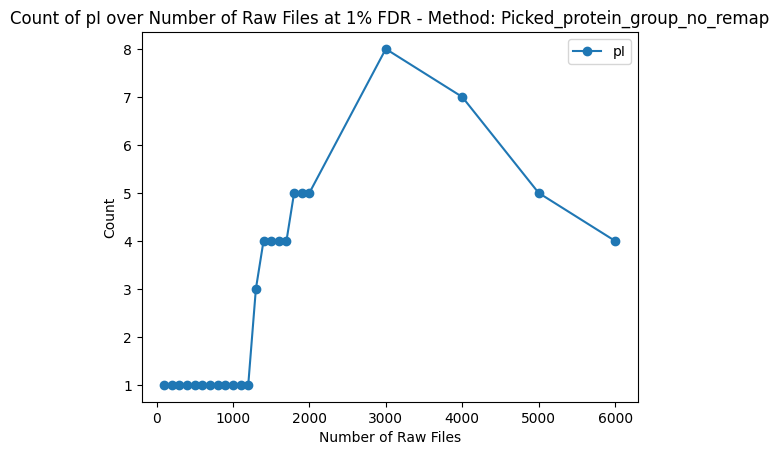

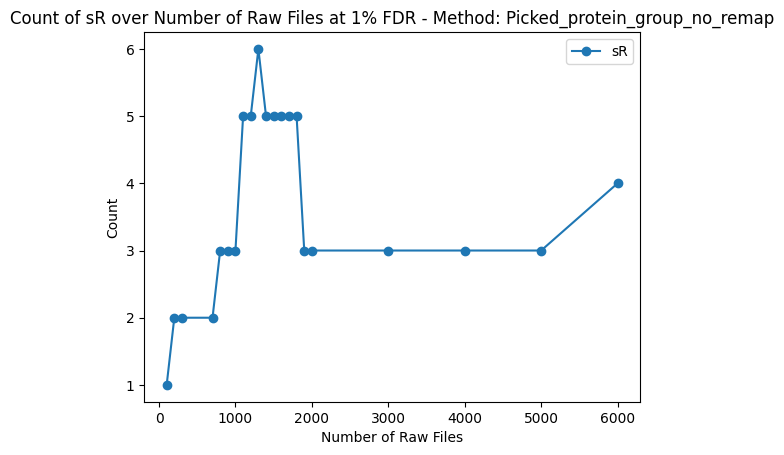

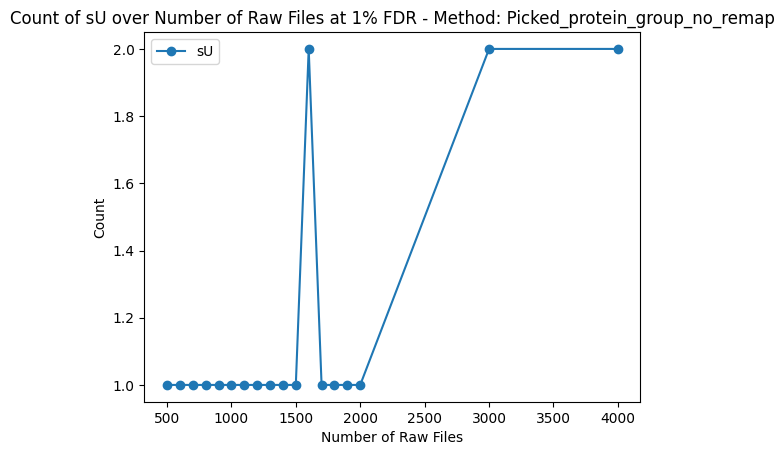

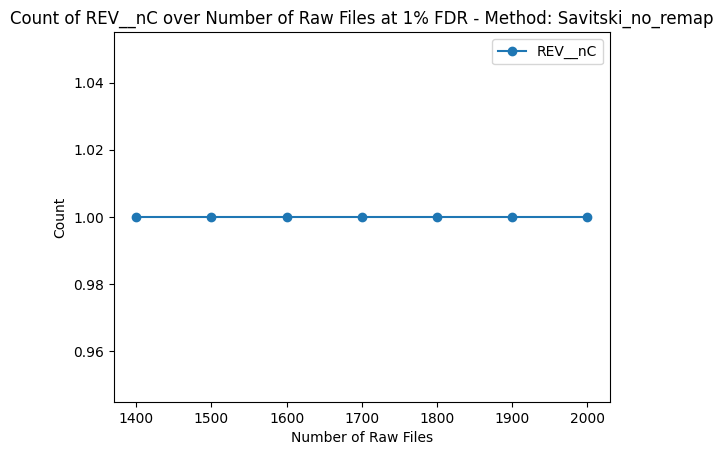

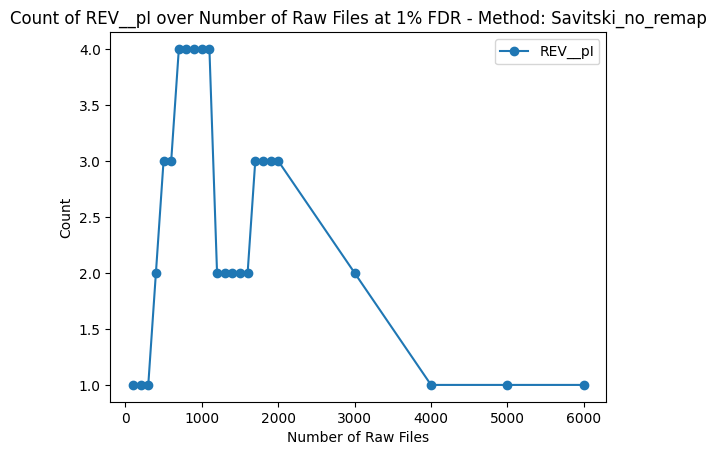

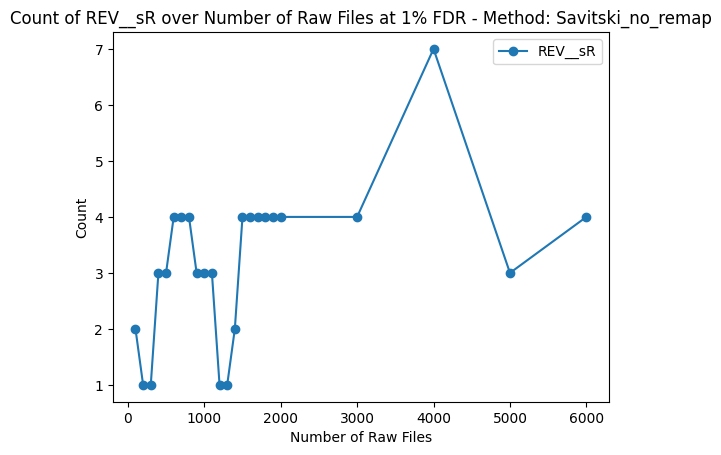

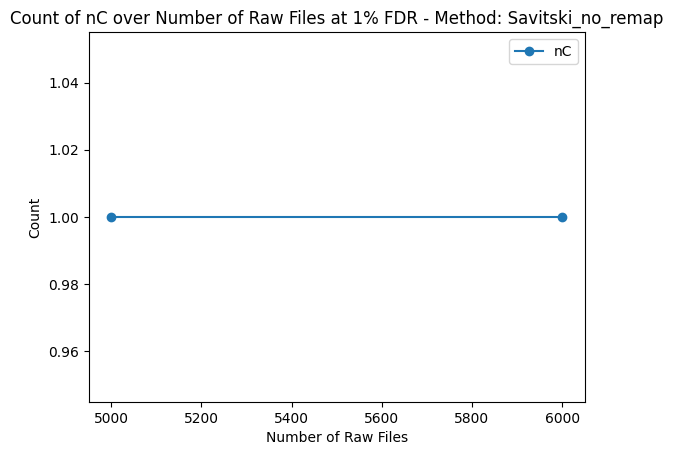

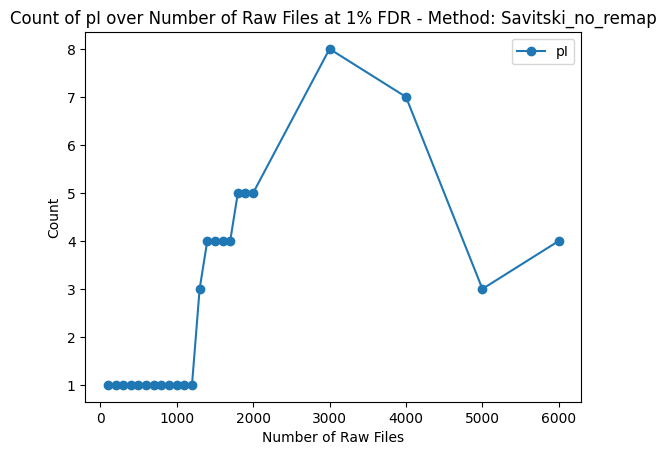

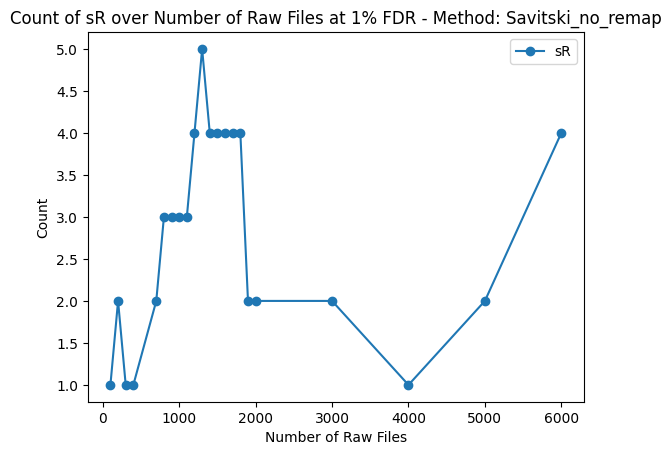

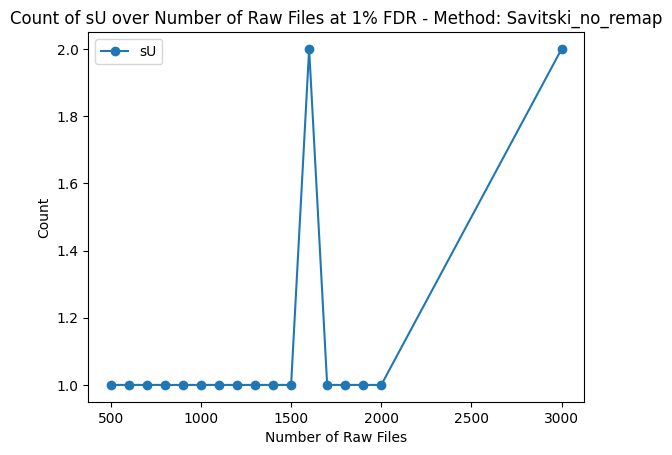

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read the CSV file into a pandas dataframe
df = pd.read_csv('all_files_protein_count_modified.csv')

# Group the data by method and protein type
grouped = df.groupby(['Method', 'Protein Type'])

# Create a folder to store the plots if it doesn't exist
if not os.path.exists('Microprotein Count Plots over 6000 Files'):
    os.mkdir('Microprotein Count Plots over 6000 Files')

# Loop through the grouped data and create a separate plot for each method-protein type combination
for (method, protein_type), group in grouped:
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the count of each protein type against the number of raw files
    ax.plot(group['Number of Raw Files'], group['Count'], marker='o', linestyle='-', label=protein_type)
    
    # Set the axis labels and legend
    ax.set_xlabel('Number of Raw Files')
    ax.set_ylabel('Count')
    ax.legend()
    
    # Set the title of the plot based on the protein type and method
    ax.set_title(f'Count of {protein_type} over Number of Raw Files at 1% FDR - Method: {method}')
    
    # Save the plot to a file
    filename = f'{method}_{protein_type}_1%FDR.png'
    filepath = os.path.join('Microprotein Count Plots over 6000 Files', filename)
    fig.savefig(filepath)
    
    # Show the plot
    plt.show()

In [ ]:
#No Q-value filter

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# specify the directory containing the CSV files
csv_dir = Path('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/SeparateProteinIDs/')

# initialize an empty dataframe to store the protein counts for all files
all_files_protein_counts = pd.DataFrame(columns=['File Name', 'Type of Microprotein', 'Count'])

# Loop through the CSV files in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.endswith('.csv'):
        # Read the CSV file into a pandas dataframe
        df = pd.read_csv(os.path.join(csv_dir, csv_file))
        
        # Filter for Q-value < 0.01 and exclude Protein Type 'sp'
        df_filtered = df[(~df['Protein Type'].isin(['sp', 'REV__sp']))]

        # Group by protein type and count the number of each type
        protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count().reset_index(name='Count')

        # Add the file name as a column to the protein count dataframe
        protein_count['File Name'] = csv_file

        # Append the protein counts for this file to the all_files_protein_counts dataframe
        all_files_protein_counts = all_files_protein_counts.append(protein_count)

# Save the protein counts dataframe as a CSV file
all_files_protein_counts.to_csv('MicroproteinCount_RawFiles_100%FDR.csv', index=False)

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2382278419.py:28: FutureWarning: The frame.append method is

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# specify the directory containing the CSV files
csv_dir = Path('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/SeparateProteinIDs/')

# Define a list of filenames in the desired order
file_order = ['SeparateProteinIDsClassic_no_grouping_no_remap_100Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_200Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_300Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_400Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_500Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_600Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_700Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_800Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_900Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1000Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1100Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1200Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1300Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1400Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1500Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1600Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1700Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1800Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1900Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_2000Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_3000Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_4000Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_5000Files.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_6000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_100Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_200Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_300Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_400Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_500Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_600Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_700Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_800Files.csv',
              'SeparateProteinIDsSavitski_no_remap_900Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1100Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1200Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1300Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1400Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1500Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1600Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1700Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1800Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_1900Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_2000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_3000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_4000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_5000Files.csv', 
              'SeparateProteinIDsSavitski_no_remap_6000Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_100Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_200Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_300Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_400Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_500Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_600Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_700Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_800Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_900Files.csv',
              'SeparateProteinIDsPicked_protein_group_no_remap_1000Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1100Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1200Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1300Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1400Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1500Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1600Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1700Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1800Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1900Files.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_2000Files.csv',
              'SeparateProteinIDsPicked_protein_group_no_remap_3000Files.csv',
              'SeparateProteinIDsPicked_protein_group_no_remap_4000Files.csv',
              'SeparateProteinIDsPicked_protein_group_no_remap_5000Files.csv',
              'SeparateProteinIDsPicked_protein_group_no_remap_6000Files.csv',
             ]


# initialize an empty dataframe to store the protein counts for all files
all_files_protein_counts = pd.DataFrame(columns=['File Name', 'Count', 'Protein Type'])

# Loop through the files in the specified order
for csv_file in file_order:
    # Read the CSV file into a pandas dataframe
    df = pd.read_csv(os.path.join(csv_dir, csv_file))
    
    # Filter for Q-value < 0.01 and exclude Protein Type 'sp'
    df_filtered = df[(~df['Protein Type'].isin(['sp', 'REV__sp']))]

    # Group by protein type and count the number of each type
    protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count().reset_index(name='Count')

    # Add the file name as a column to the protein count dataframe
    protein_count['File Name'] = csv_file

    # Append the protein counts for this file to the all_files_protein_counts dataframe
    all_files_protein_counts = all_files_protein_counts.append(protein_count)

# Save the protein counts dataframe as a CSV file
all_files_protein_counts.to_csv('all_files_protein_counts_100%FDR.csv', index=False)

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append metho

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append metho

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_files_protein_counts = all_files_protein_counts.append(protein_count)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_25267/2535365714.py:103: FutureWarning: The frame.append metho

In [47]:
df=pd.read_csv('all_files_protein_counts_100%FDR.csv')
print(df)

                                             File Name  Count Protein Type
0    SeparateProteinIDsClassic_no_grouping_no_remap...      1      REV__nC
1    SeparateProteinIDsClassic_no_grouping_no_remap...     41      REV__pI
2    SeparateProteinIDsClassic_no_grouping_no_remap...     67      REV__sR
3    SeparateProteinIDsClassic_no_grouping_no_remap...      5      REV__sU
4    SeparateProteinIDsClassic_no_grouping_no_remap...      7           nC
..                                                 ...    ...          ...
571  SeparateProteinIDsPicked_protein_group_no_rema...    240      REV__sU
572  SeparateProteinIDsPicked_protein_group_no_rema...    148           nC
573  SeparateProteinIDsPicked_protein_group_no_rema...   1726           pI
574  SeparateProteinIDsPicked_protein_group_no_rema...   2276           sR
575  SeparateProteinIDsPicked_protein_group_no_rema...    264           sU

[576 rows x 3 columns]


In [50]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('all_files_protein_count_modified_100%FDR.csv')

# Extract the method name and number of raw files from the file name
df['Method'] = df['File Name'].apply(lambda x: x.split('_')[1] + '_' + x.split('_')[2])
df['Number of Raw Files'] = df['File Name'].apply(lambda x: int(x.split('_')[-1].replace('Files.csv', '')))

# Save the modified dataframe as a new CSV file
df.to_csv('all_files_protein_count_modified.csv', index=False)

In [52]:
df=pd.read_csv('all_files_protein_count_modified_100%FDR.csv')
print(df)

                                             File Name  Count Protein Type  \
0    SeparateProteinIDsClassic_no_grouping_no_remap...      1      REV__nC   
1    SeparateProteinIDsClassic_no_grouping_no_remap...     41      REV__pI   
2    SeparateProteinIDsClassic_no_grouping_no_remap...     67      REV__sR   
3    SeparateProteinIDsClassic_no_grouping_no_remap...      5      REV__sU   
4    SeparateProteinIDsClassic_no_grouping_no_remap...      7           nC   
..                                                 ...    ...          ...   
571  SeparateProteinIDsPicked_protein_group_no_rema...    240      REV__sU   
572  SeparateProteinIDsPicked_protein_group_no_rema...    148           nC   
573  SeparateProteinIDsPicked_protein_group_no_rema...   1726           pI   
574  SeparateProteinIDsPicked_protein_group_no_rema...   2276           sR   
575  SeparateProteinIDsPicked_protein_group_no_rema...    264           sU   

                            Method  Number of Raw Files  
0    

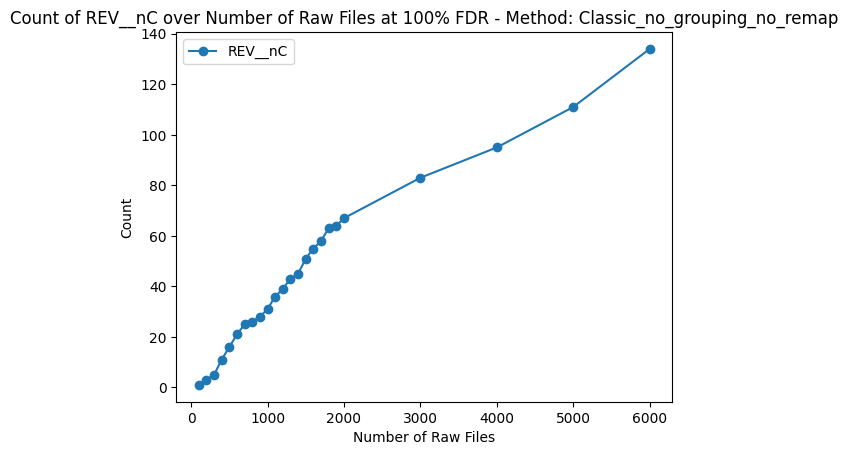

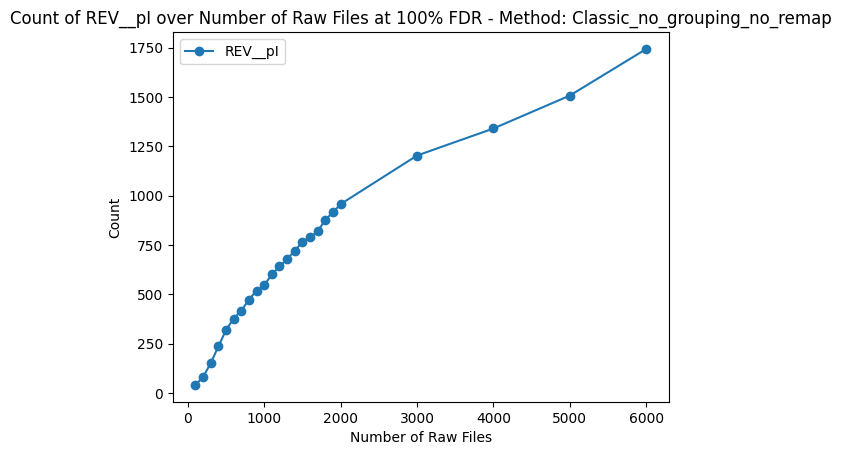

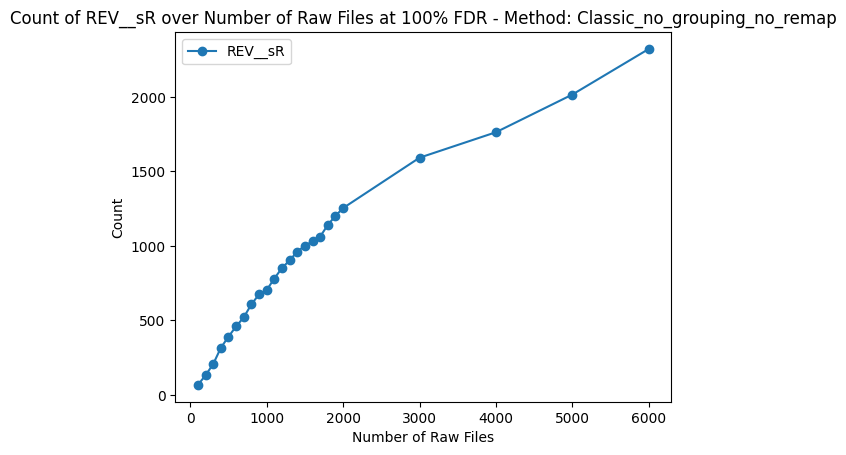

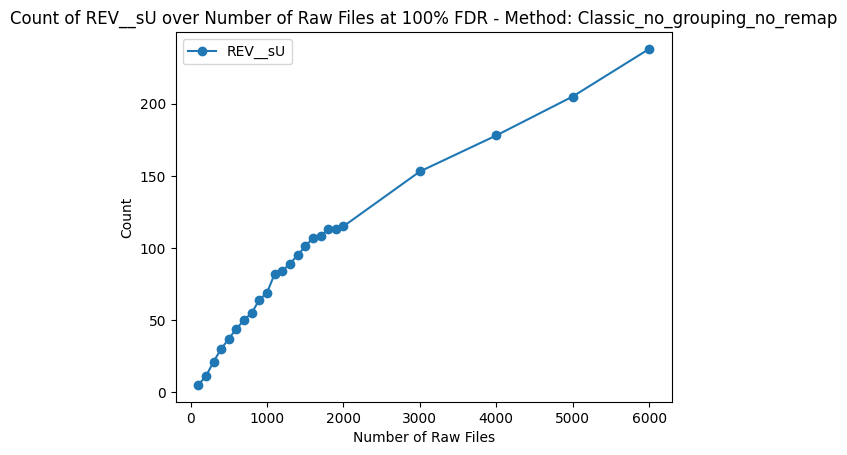

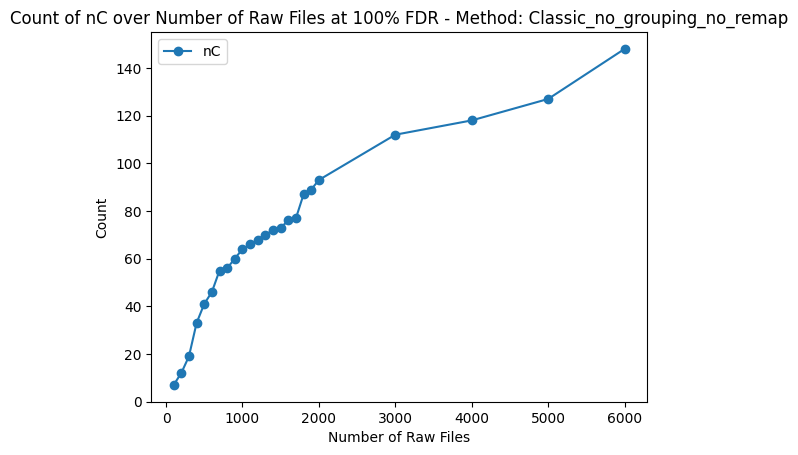

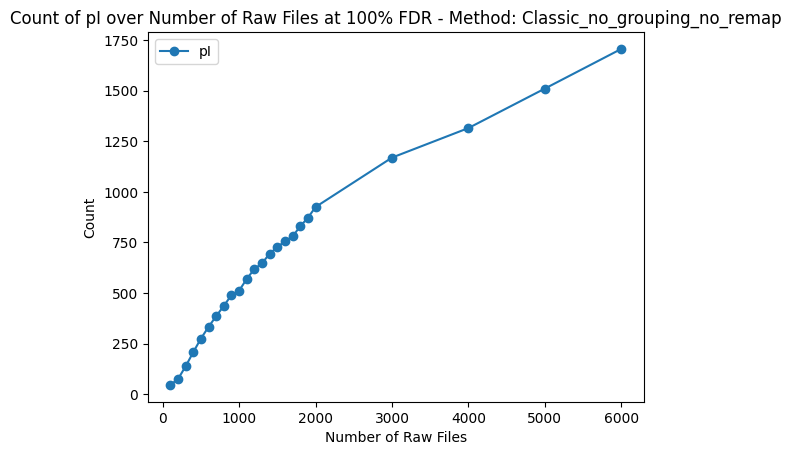

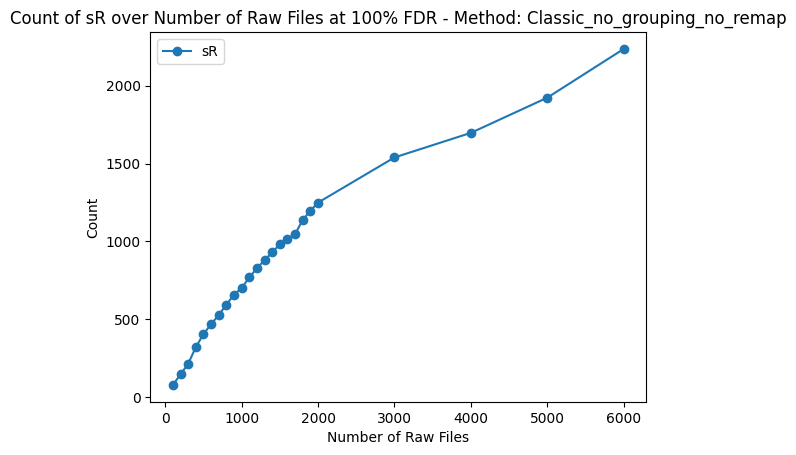

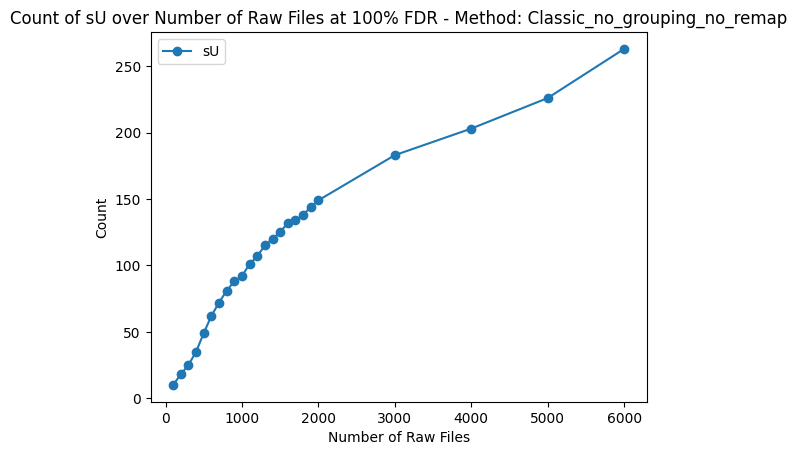

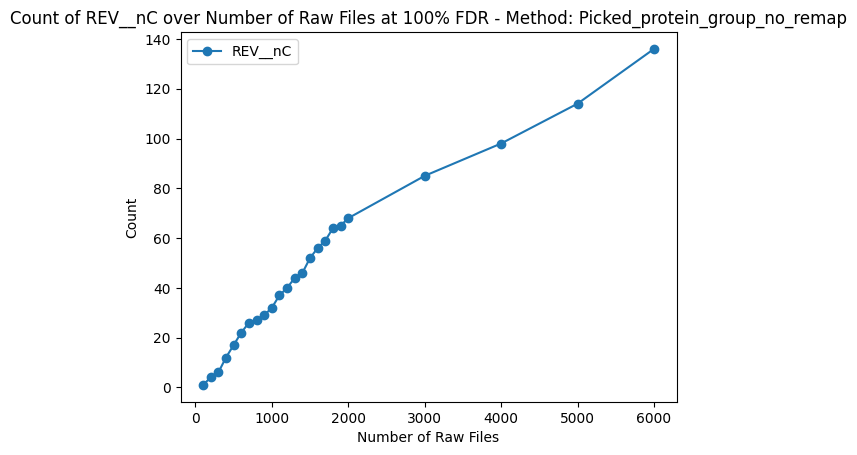

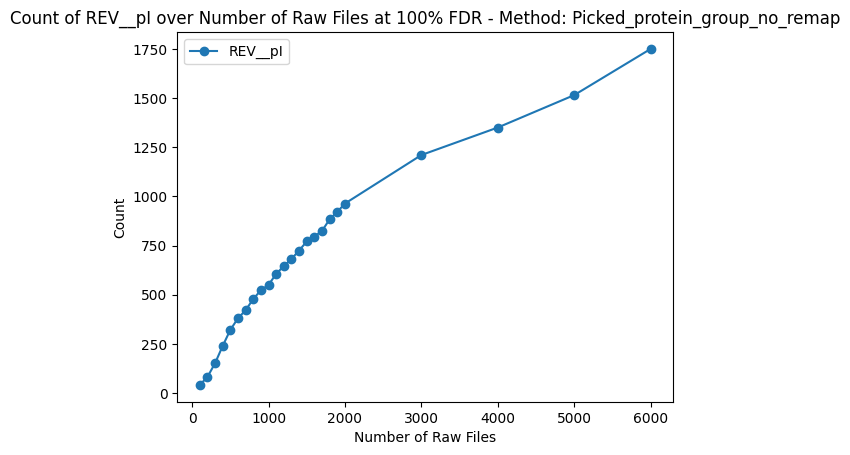

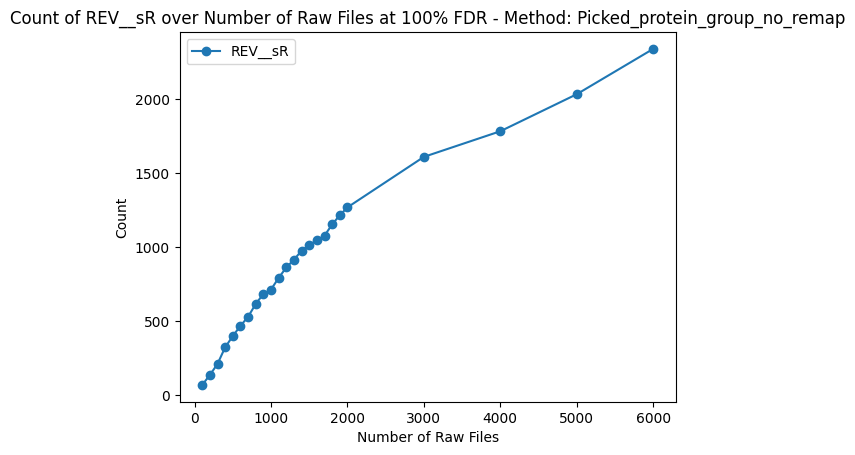

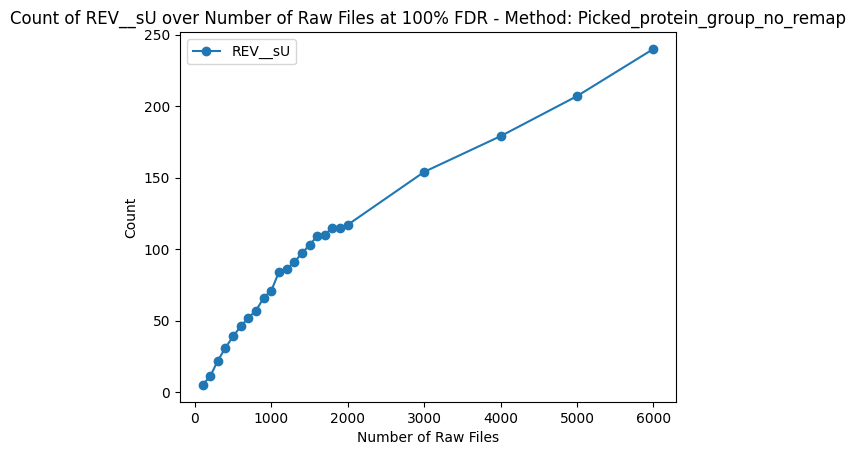

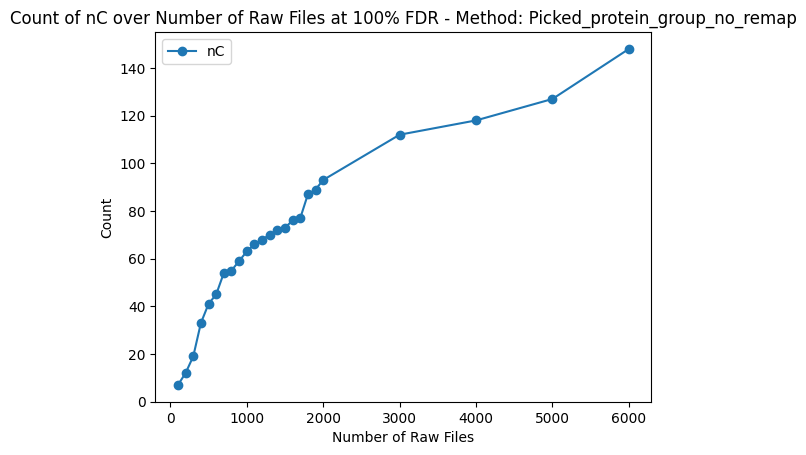

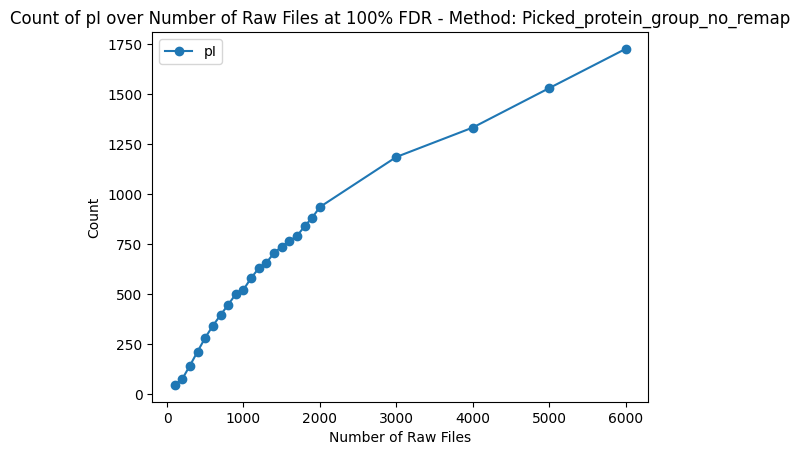

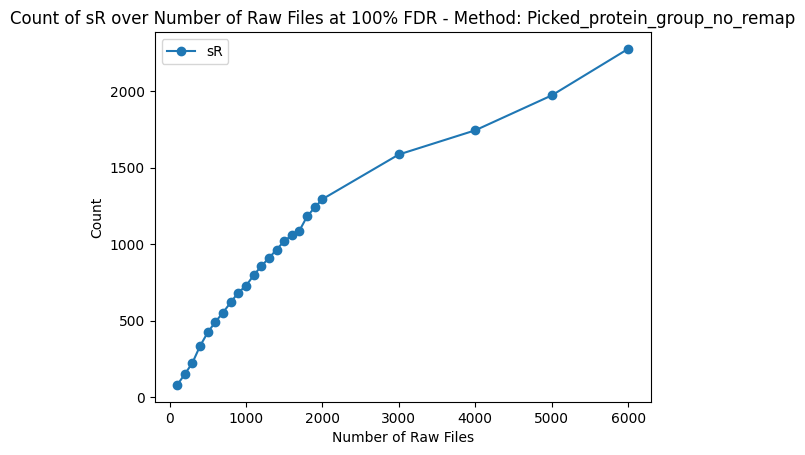

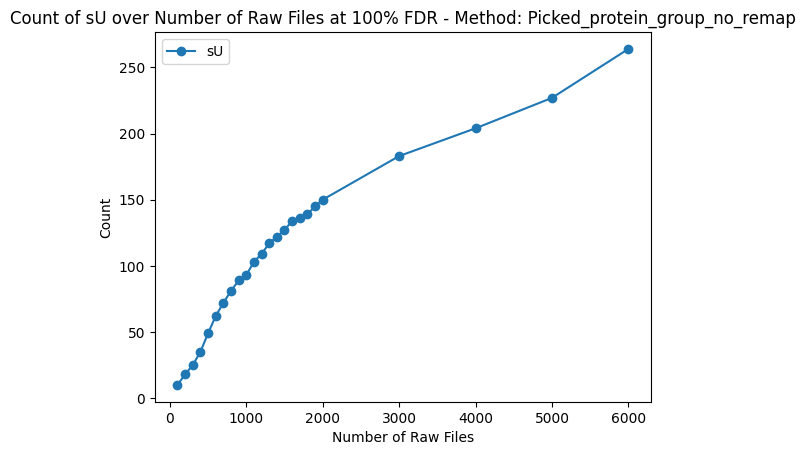

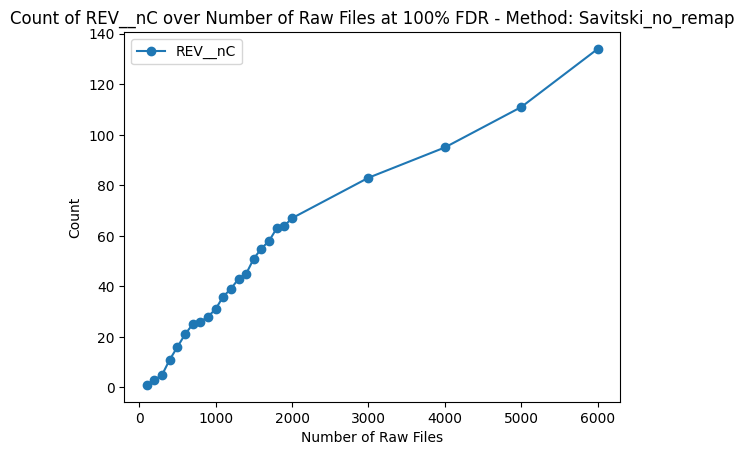

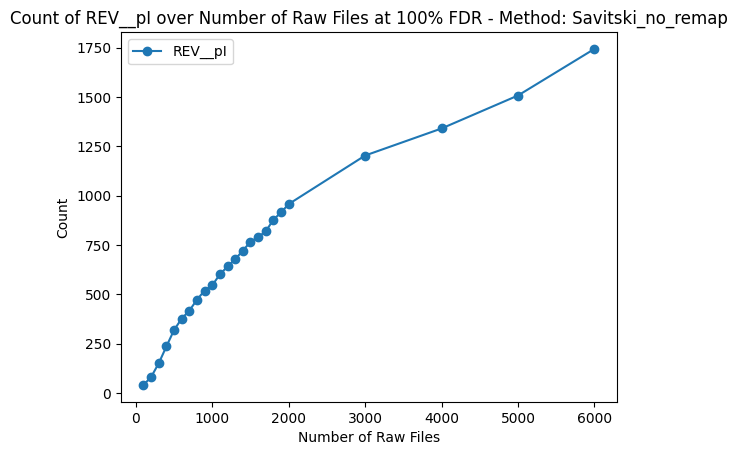

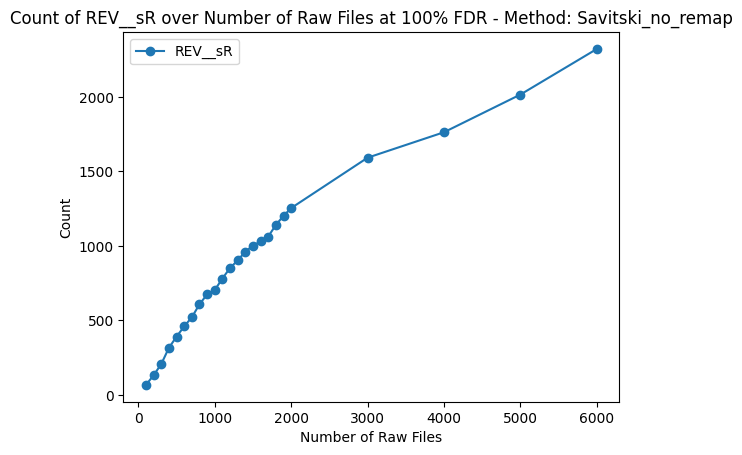

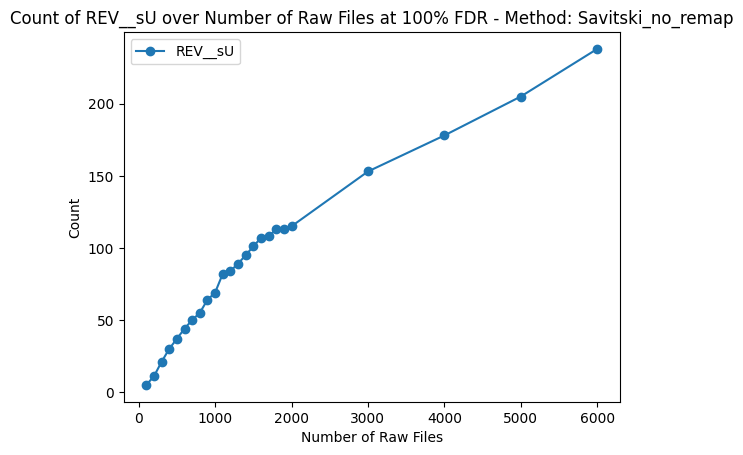

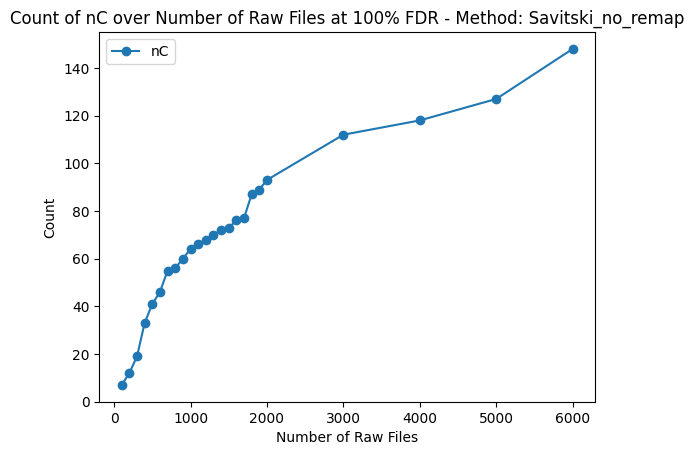

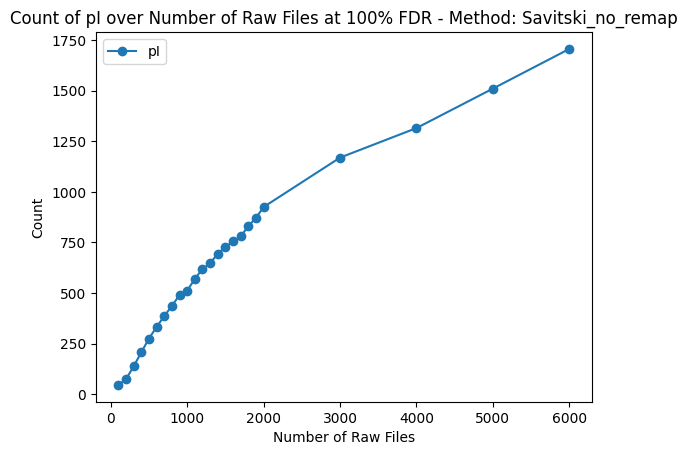

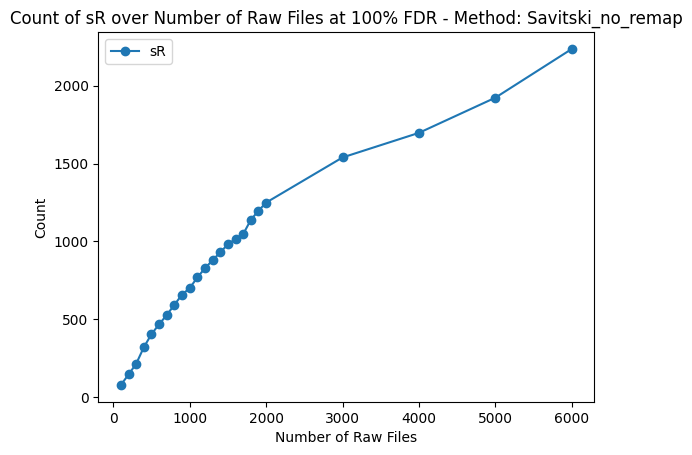

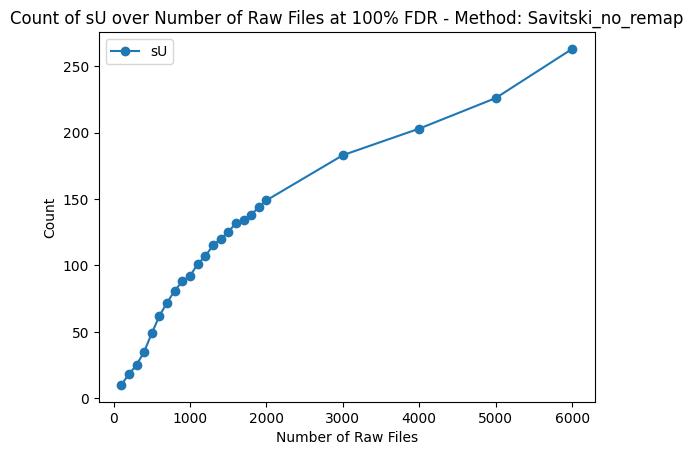

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read the CSV file into a pandas dataframe
df = pd.read_csv('all_files_protein_count_modified_100%FDR.csv')

# Group the data by method and protein type
grouped = df.groupby(['Method', 'Protein Type'])

# Create a folder to store the plots if it doesn't exist
if not os.path.exists('Microprotein Count Plots over 6000 Files'):
    os.mkdir('Microprotein Count Plots over 6000 Files')

# Loop through the grouped data and create a separate plot for each method-protein type combination
for (method, protein_type), group in grouped:
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Plot the count of each protein type against the number of raw files
    ax.plot(group['Number of Raw Files'], group['Count'], marker='o', linestyle='-', label=protein_type)
    
    # Set the axis labels and legend
    ax.set_xlabel('Number of Raw Files')
    ax.set_ylabel('Count')
    ax.legend()
    
    # Set the title of the plot based on the protein type and method
    ax.set_title(f'Count of {protein_type} over Number of Raw Files at 100% FDR - Method: {method}')
    
    # Save the plot to a file
    filename = f'{method}_{protein_type}_100%FDR.png'
    filepath = os.path.join('Microprotein Count Plots over 6000 Files', filename)
    fig.savefig(filepath)
    
    # Show the plot
    plt.show()